# Project Stage 2 (Data Modeling and Comparative Analysis)

#### Initially data modeling is performed, which is a crucial step in the data management and analysis process and helps in creating a conceptual representation of the data and its relationships to facilitate understanding, communication and analysis. And then perform comparative anaysis. 

## 1. Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

####  Initially, Will perform data cleaning and transformation operations on the supercovid19 dataframe. Will use melt function to reshape the data in the supercovid19 dataframe from wide format to long format. (date columns to rows)

In [1]:
# Importing all the required packages
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
# SuperCovid19 dataset
df_cases=pd.read_csv("../../../Data Science/Consumed Datasets/Stage 1/covid_confirmed_usafacts.csv")
df_deaths=pd.read_csv("../../../Data Science/Consumed Datasets/Stage 1/covid_deaths_usafacts.csv")
df_population=pd.read_csv("../../../Data Science/Consumed Datasets/Stage 1/covid_county_population_usafacts.csv")
Merge_df = pd.merge(df_cases,df_deaths,on=('countyFIPS','County Name','State','StateFIPS'),how='outer')
df_population=df_population.drop(['County Name','State'],axis=1)
df_supercovid19=pd.merge(Merge_df,df_population, on=('countyFIPS'))
df_supercovid19

,countyFIPS,County Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-15_y,2023-07-16_y,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,142,142,42343
5739,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
5740,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
5741,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,7805


In [3]:
# Filtering out the dataset to include only 2020 records.
formats_to_remove=['2021-','2022-','2023-']
columns_to_keep = [col for col in df_supercovid19.columns if not any(format_to_remove in col for format_to_remove in formats_to_remove)]
df_filtered_dates = df_supercovid19[columns_to_keep]
df_filtered_dates

,countyFIPS,County Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y,2020-12-31_y,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,16,42343
5739,56039,Teton County,WY,56,0,0,0,0,0,0,...,2,2,2,2,2,3,3,3,4,23464
5740,56041,Uinta County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,20226
5741,56043,Washakie County,WY,56,0,0,0,0,0,0,...,11,11,11,11,11,16,16,16,19,7805


In [4]:
# Removing unwanted records(Jan 2020 to June 2020) of 2020 and keeping only the records from 2020 july to 2020 dec.
formats_to_remove=['2020-01-','2020-02-','2020-03-','2020-04','2020-05','2020-06']
columns_to_keep = [col for col in df_filtered_dates.columns if not any(format_to_remove in col for format_to_remove in formats_to_remove)]
df_filtered = df_filtered_dates[columns_to_keep]
df_filtered
#columns_to_keep

,countyFIPS,County Name,State,StateFIPS,2020-07-01_x,2020-07-02_x,2020-07-03_x,2020-07-04_x,2020-07-05_x,2020-07-06_x,...,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y,2020-12-31_y,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,89,92,100,102,106,113,...,15,15,15,15,15,15,15,15,16,42343
5739,56039,Teton County,WY,56,134,136,135,137,140,145,...,2,2,2,2,2,3,3,3,4,23464
5740,56041,Uinta County,WY,56,177,180,182,183,184,190,...,7,7,7,7,7,7,7,7,7,20226
5741,56043,Washakie County,WY,56,39,39,39,39,39,39,...,11,11,11,11,11,16,16,16,19,7805


In [5]:
# Creating cases dataframe seperately and removing _x suffix from column names.
ending_to_remove = '_y'
columns_to_keep = [col for col in df_filtered.columns if not col.endswith(ending_to_remove)]
cases=df_filtered[columns_to_keep]
suffix_to_remove='_x'
cases.columns = cases.columns.str.rstrip(suffix_to_remove)
cases

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,89,92,100,102,106,113,...,2820,2820,2820,2845,2854,2921,2929,2943,2966,42343
5739,56039,Teton County,WY,56,134,136,135,137,140,145,...,2039,2039,2039,2080,2080,2108,2112,2121,2138,23464
5740,56041,Uinta County,WY,56,177,180,182,183,184,190,...,1475,1475,1475,1495,1497,1507,1521,1540,1558,20226
5741,56043,Washakie County,WY,56,39,39,39,39,39,39,...,726,726,726,747,747,763,764,768,781,7805


In [6]:
# Creating deaths dataframe seperately and removing _y suffix from column names.
ending_to_remove = '_x'
columns_to_keep = [col for col in df_filtered.columns if not col.endswith(ending_to_remove)]
deaths=df_filtered[columns_to_keep]
suffix_to_remove='_y'
deaths.columns = deaths.columns.str.rstrip(suffix_to_remove)
deaths

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,16,42343
5739,56039,Teton County,WY,56,1,1,1,1,1,1,...,2,2,2,2,2,3,3,3,4,23464
5740,56041,Uinta County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,20226
5741,56043,Washakie County,WY,56,5,5,5,5,5,5,...,11,11,11,11,11,16,16,16,19,7805


In [7]:
cases.describe()

,countyFIPS,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,population
count,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,...,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5.743000e+03
mean,16622.919380,29.682570,621.561379,640.244646,646.143827,656.473446,670.511057,677.945151,693.613442,712.373498,...,3950.668292,3996.985025,4030.275640,4044.121191,4082.245342,4124.485983,4172.861048,4404.195020,4294.372105,5.715471e+04
std,18829.354567,15.401841,3255.197695,3326.331725,3372.748596,3418.019544,3462.101346,3497.230513,3561.950575,3637.582375,...,15962.842767,16190.035825,16314.911313,16421.132931,16587.164301,16844.633535,17152.882338,17519.134601,17772.100253,2.520514e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,18.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.500000,21.000000,21.000000,9.000000,21.000000,21.000000,9.500000,26.000000,27.000000,0.000000e+00
50%,8051.000000,29.000000,31.000000,32.000000,34.000000,35.000000,38.000000,40.000000,41.000000,43.000000,...,683.000000,719.000000,723.000000,685.000000,731.000000,740.000000,752.000000,813.000000,750.000000,4.333000e+03
75%,31104.000000,44.000000,216.500000,222.000000,227.000000,231.500000,234.500000,240.000000,245.500000,251.000000,...,2616.500000,2633.500000,2651.000000,2670.500000,2687.500000,2699.000000,2712.000000,2762.500000,2806.500000,2.990400e+04
max,56045.000000,56.000000,121271.000000,124858.000000,128060.000000,130078.000000,131595.000000,133411.000000,136632.000000,140250.000000,...,712068.000000,729268.000000,738270.000000,742414.000000,756026.000000,764528.000000,785920.000000,808206.000000,828328.000000,1.003911e+07


In [8]:
# Transforming the dataset using melt function to convert the date columns as rows.
cases = cases.melt(id_vars=['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], var_name='date', value_name='cases')
cases.drop_duplicates()

,countyFIPS,County Name,State,StateFIPS,population,date,cases
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0
51,0,Statewide Unallocated,AK,2,0,2020-07-01,0
102,0,Statewide Unallocated,AZ,4,0,2020-07-01,0
153,0,Statewide Unallocated,AR,5,0,2020-07-01,706
204,0,Statewide Unallocated,CA,6,0,2020-07-01,21
...,...,...,...,...,...,...,...
1056707,56037,Sweetwater County,WY,56,42343,2020-12-31,2966
1056708,56039,Teton County,WY,56,23464,2020-12-31,2138
1056709,56041,Uinta County,WY,56,20226,2020-12-31,1558
1056710,56043,Washakie County,WY,56,7805,2020-12-31,781


In [9]:
# Converting the datatype of date column from Int to datetime object.
cases['date'] = pd.to_datetime(cases['date'])
cases.dtypes

countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
population              int64
date           datetime64[ns]
cases                   int64
dtype: object

In [10]:
# Transforming the dataset using melt function to convert the date columns as rows.
deaths = deaths.melt(id_vars=['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], var_name='date', value_name='deaths')
deaths.drop_duplicates()

,countyFIPS,County Name,State,StateFIPS,population,date,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0
51,0,Statewide Unallocated,AK,2,0,2020-07-01,0
102,0,Statewide Unallocated,AZ,4,0,2020-07-01,0
153,0,Statewide Unallocated,AR,5,0,2020-07-01,0
204,0,Statewide Unallocated,CA,6,0,2020-07-01,0
...,...,...,...,...,...,...,...
1056707,56037,Sweetwater County,WY,56,42343,2020-12-31,16
1056708,56039,Teton County,WY,56,23464,2020-12-31,4
1056709,56041,Uinta County,WY,56,20226,2020-12-31,7
1056710,56043,Washakie County,WY,56,7805,2020-12-31,19


In [11]:
# Converting the datatype of date column from Int to datetime object.
deaths['date'] = pd.to_datetime(deaths['date'])
deaths.dtypes

countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
population              int64
date           datetime64[ns]
deaths                  int64
dtype: object

In [12]:
# Merging  cases and deaths dataframes into a single dataframe.
cases_deaths = pd.merge(cases,deaths,on=['countyFIPS','County Name','State','StateFIPS','population','date'])
cases_deaths = cases_deaths.drop_duplicates()
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
2601,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
5202,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
7803,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
10404,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
24985907,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
24985908,56039,Teton County,WY,56,23464,2020-12-31,2138,4
24985909,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
24985910,56043,Washakie County,WY,56,7805,2020-12-31,781,19


In [13]:
# Creating a copy of cases_deaths so that it can be used in later analysis.
Main_df=cases_deaths
Main_df

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
2601,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
5202,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
7803,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
10404,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
24985907,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
24985908,56039,Teton County,WY,56,23464,2020-12-31,2138,4
24985909,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
24985910,56043,Washakie County,WY,56,7805,2020-12-31,781,19


#### Choosing 'North Carolina (NC) State' and computing weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state" and plotting the graphs representing weekly state stats.

In [14]:
# Selecting a state to perform analysis
selected_state='NC'

#Filtering the dataset
cases_deaths= cases_deaths[cases_deaths['State']==selected_state]
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
85833,0,Statewide Unallocated,NC,37,0,2020-07-01,3,0
134541,37001,Alamance County,NC,37,169509,2020-07-01,1151,37
134542,37003,Alexander County,NC,37,37497,2020-07-01,93,1
134543,37005,Alleghany County,NC,37,11137,2020-07-01,32,0
134544,37007,Anson County,NC,37,24446,2020-07-01,132,1
...,...,...,...,...,...,...,...,...
24984755,37191,Wayne County,NC,37,123131,2020-12-31,7422,145
24984756,37193,Wilkes County,NC,37,68412,2020-12-31,3877,72
24984757,37195,Wilson County,NC,37,81801,2020-12-31,5516,103
24984758,37197,Yadkin County,NC,37,37667,2020-12-31,2377,28


In [15]:
weekly_stats = cases_deaths.groupby(cases_deaths['date'].dt.to_period("W")).agg({
    'cases': ['mean', 'median', lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None],
    'deaths': ['mean', 'median', lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None]
}).reset_index()

# Rename columns for clarity
weekly_stats.columns = ['week', 'nc_cases_mean', 'nc_cases_median', 'nc_cases_mode', 'nc_deaths_mean', 'nc_deaths_median', 'nc_deaths_mode']


In [16]:
weekly_stats

,week,nc_cases_mean,nc_cases_median,nc_cases_mode,nc_deaths_mean,nc_deaths_median,nc_deaths_mode
0,2020-06-29/2020-07-05,692.045545,317.0,13,13.699010,4.0,0
1,2020-07-06/2020-07-12,789.022631,359.0,37,14.404526,5.0,0
2,2020-07-13/2020-07-19,926.309760,427.0,39,15.643564,6.0,0
3,2020-07-20/2020-07-26,1058.577086,481.0,68,17.033946,6.0,0
4,2020-07-27/2020-08-02,1187.670438,563.0,37,18.660537,8.0,2
5,2020-08-03/2020-08-09,1299.769448,623.0,78,20.632249,10.0,2
6,2020-08-10/2020-08-16,1400.173975,691.0,73,22.437058,11.0,2
7,2020-08-17/2020-08-23,1497.783593,750.0,83,24.305516,12.0,2
8,2020-08-24/2020-08-30,1606.831683,824.0,89,25.968883,12.0,2
9,2020-08-31/2020-09-06,1705.157001,874.0,93,27.729844,17.0,3


In [17]:
weekly_stats['week']=weekly_stats['week'].astype(str)
weekly_stats

,week,nc_cases_mean,nc_cases_median,nc_cases_mode,nc_deaths_mean,nc_deaths_median,nc_deaths_mode
0,2020-06-29/2020-07-05,692.045545,317.0,13,13.699010,4.0,0
1,2020-07-06/2020-07-12,789.022631,359.0,37,14.404526,5.0,0
2,2020-07-13/2020-07-19,926.309760,427.0,39,15.643564,6.0,0
3,2020-07-20/2020-07-26,1058.577086,481.0,68,17.033946,6.0,0
4,2020-07-27/2020-08-02,1187.670438,563.0,37,18.660537,8.0,2
5,2020-08-03/2020-08-09,1299.769448,623.0,78,20.632249,10.0,2
6,2020-08-10/2020-08-16,1400.173975,691.0,73,22.437058,11.0,2
7,2020-08-17/2020-08-23,1497.783593,750.0,83,24.305516,12.0,2
8,2020-08-24/2020-08-30,1606.831683,824.0,89,25.968883,12.0,2
9,2020-08-31/2020-09-06,1705.157001,874.0,93,27.729844,17.0,3


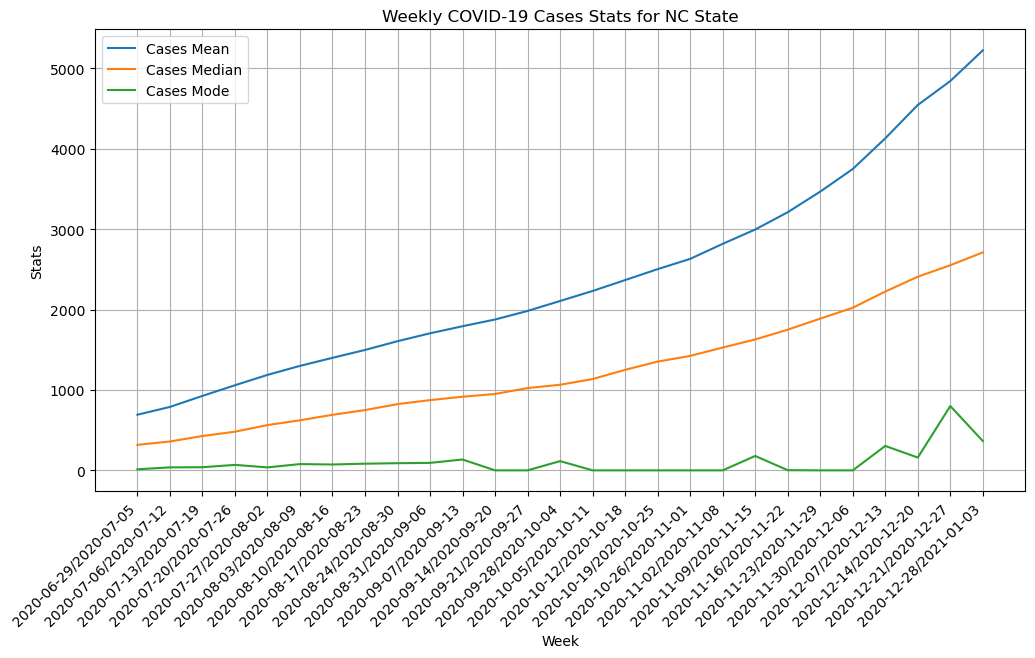

In [18]:
# Plotting a line graph for NC Cases Stats
plt.figure(figsize=(12, 6))
plt.plot(weekly_stats['week'], weekly_stats['nc_cases_mean'], label=f'Cases Mean')
plt.plot(weekly_stats['week'], weekly_stats['nc_cases_median'], label=f'Cases Median')
plt.plot(weekly_stats['week'], weekly_stats['nc_cases_mode'], label=f'Cases Mode')
plt.xlabel('Week')
plt.ylabel('Stats')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Cases Stats for NC State')
plt.legend()
plt.grid(True)
plt.show()

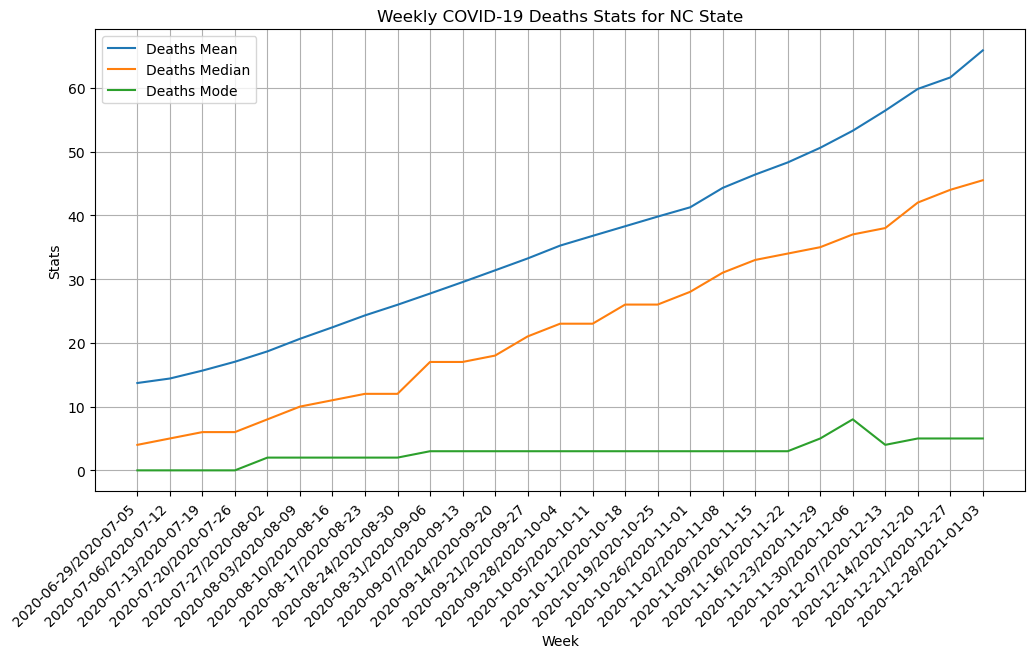

In [19]:
# Plotting a line graph for NC Death Stats
plt.figure(figsize=(12, 6))
plt.plot(weekly_stats['week'], weekly_stats['nc_deaths_mean'], label=f'Deaths Mean')
plt.plot(weekly_stats['week'], weekly_stats['nc_deaths_median'], label=f'Deaths Median')
plt.plot(weekly_stats['week'], weekly_stats['nc_deaths_mode'], label=f'Deaths Mode')
plt.xlabel('Week')
plt.ylabel('Stats')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Deaths Stats for NC State')
plt.legend()
plt.grid(True)
plt.show()

### An alternate approach 
#### Using RESAMPLE to compute mean, media and mode of the data

In [20]:
weekly_data = cases_deaths.set_index('date').resample('W')
weekly_data['cases'].sum()
mean_cases = weekly_data['cases'].mean()
mean_cases

date
2020-07-05     692.045545
2020-07-12     789.022631
2020-07-19     926.309760
2020-07-26    1058.577086
2020-08-02    1187.670438
2020-08-09    1299.769448
2020-08-16    1400.173975
2020-08-23    1497.783593
2020-08-30    1606.831683
2020-09-06    1705.157001
2020-09-13    1793.140028
2020-09-20    1876.947666
2020-09-27    1983.449788
2020-10-04    2107.383310
2020-10-11    2231.950495
2020-10-18    2367.571429
2020-10-25    2503.483734
2020-11-01    2631.226308
2020-11-08    2818.188119
2020-11-15    2996.654880
2020-11-22    3211.626591
2020-11-29    3467.958982
2020-12-06    3749.198020
2020-12-13    4131.067893
2020-12-20    4546.072136
2020-12-27    4843.878359
2021-01-03    5225.586634
Freq: W-SUN, Name: cases, dtype: float64

In [21]:
weekly_data['deaths'].sum()
mean_deaths = weekly_data['deaths'].mean()
mean_deaths

date
2020-07-05    13.699010
2020-07-12    14.404526
2020-07-19    15.643564
2020-07-26    17.033946
2020-08-02    18.660537
2020-08-09    20.632249
2020-08-16    22.437058
2020-08-23    24.305516
2020-08-30    25.968883
2020-09-06    27.729844
2020-09-13    29.524752
2020-09-20    31.369165
2020-09-27    33.230552
2020-10-04    35.248939
2020-10-11    36.775106
2020-10-18    38.285714
2020-10-25    39.797737
2020-11-01    41.257426
2020-11-08    44.298444
2020-11-15    46.394625
2020-11-22    48.291372
2020-11-29    50.591231
2020-12-06    53.265912
2020-12-13    56.424328
2020-12-20    59.823197
2020-12-27    61.623762
2021-01-03    65.871287
Freq: W-SUN, Name: deaths, dtype: float64

In [22]:
median_cases = weekly_data['cases'].median()
median_cases

date
2020-07-05     317.0
2020-07-12     359.0
2020-07-19     427.0
2020-07-26     481.0
2020-08-02     563.0
2020-08-09     623.0
2020-08-16     691.0
2020-08-23     750.0
2020-08-30     824.0
2020-09-06     874.0
2020-09-13     916.0
2020-09-20     950.0
2020-09-27    1024.0
2020-10-04    1065.0
2020-10-11    1136.0
2020-10-18    1251.0
2020-10-25    1353.0
2020-11-01    1424.0
2020-11-08    1528.0
2020-11-15    1629.0
2020-11-22    1750.0
2020-11-29    1888.0
2020-12-06    2023.0
2020-12-13    2225.0
2020-12-20    2409.0
2020-12-27    2552.0
2021-01-03    2712.0
Freq: W-SUN, Name: cases, dtype: float64

In [23]:
median_deaths = weekly_data['deaths'].median()
median_deaths

date
2020-07-05     4.0
2020-07-12     5.0
2020-07-19     6.0
2020-07-26     6.0
2020-08-02     8.0
2020-08-09    10.0
2020-08-16    11.0
2020-08-23    12.0
2020-08-30    12.0
2020-09-06    17.0
2020-09-13    17.0
2020-09-20    18.0
2020-09-27    21.0
2020-10-04    23.0
2020-10-11    23.0
2020-10-18    26.0
2020-10-25    26.0
2020-11-01    28.0
2020-11-08    31.0
2020-11-15    33.0
2020-11-22    34.0
2020-11-29    35.0
2020-12-06    37.0
2020-12-13    38.0
2020-12-20    42.0
2020-12-27    44.0
2021-01-03    45.5
Freq: W-SUN, Name: deaths, dtype: float64

In [24]:
mode_cases=cases_deaths.groupby(cases_deaths['date'].dt.to_period("W")).agg({'cases':[lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None]}).reset_index()
mode_cases

,date,cases
,,<lambda>
0,2020-06-29/2020-07-05,13
1,2020-07-06/2020-07-12,37
2,2020-07-13/2020-07-19,39
3,2020-07-20/2020-07-26,68
4,2020-07-27/2020-08-02,37
5,2020-08-03/2020-08-09,78
6,2020-08-10/2020-08-16,73
7,2020-08-17/2020-08-23,83
8,2020-08-24/2020-08-30,89


In [25]:
mode_deaths=cases_deaths.groupby(cases_deaths['date'].dt.to_period("W")).agg({'deaths':[lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None]}).reset_index()
mode_deaths

,date,deaths
,,<lambda>
0,2020-06-29/2020-07-05,0
1,2020-07-06/2020-07-12,0
2,2020-07-13/2020-07-19,0
3,2020-07-20/2020-07-26,0
4,2020-07-27/2020-08-02,2
5,2020-08-03/2020-08-09,2
6,2020-08-10/2020-08-16,2
7,2020-08-17/2020-08-23,2
8,2020-08-24/2020-08-30,2


## 2. Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

#### Selecting Alaska (AK), Arizona (AZ), Alabama (AL), Texas (TX), Virginia (VA) for further analysis

In [26]:
# Selecting a state to perform analysis
selected_states=['VA','AZ','AL','AK','TX']
selected_data = Main_df[Main_df['State'].isin(selected_states)]
selected_data

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
2601,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
5202,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
111843,0,Statewide Unallocated,TX,48,0,2020-07-01,0,0
119646,0,Statewide Unallocated,VA,51,0,2020-07-01,0,0
...,...,...,...,...,...,...,...,...
24985718,51800,City of Suffolk,VA,51,92108,2020-12-31,3987,90
24985719,51810,City of Virginia Beach,VA,51,449974,2020-12-31,16629,150
24985720,51820,City of Waynesboro,VA,51,22630,2020-12-31,1194,13
24985721,51830,City of Williamsburg,VA,51,14954,2020-12-31,358,8


#### Calculaing cases and death rates and plotting graph without normalizing the data.

In [27]:
# Calculating cases and deaths rate
selected_data_nn=selected_data
selected_data_nn['cases_rate']=selected_data_nn['cases']/selected_data_nn['population']
selected_data_nn['deaths_rate']=selected_data_nn['deaths']/selected_data_nn['population']
selected_data_nn

C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\2119470149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_nn['cases_rate']=selected_data_nn['cases']/selected_data_nn['population']
C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\2119470149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_nn['deaths_rate']=selected_data_nn['deaths']/selected_data_nn['population']


,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,cases_rate,deaths_rate
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0,NaN,NaN
2601,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0,NaN,NaN
5202,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0,NaN,NaN
111843,0,Statewide Unallocated,TX,48,0,2020-07-01,0,0,NaN,NaN
119646,0,Statewide Unallocated,VA,51,0,2020-07-01,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24985718,51800,City of Suffolk,VA,51,92108,2020-12-31,3987,90,0.043286,0.000977
24985719,51810,City of Virginia Beach,VA,51,449974,2020-12-31,16629,150,0.036955,0.000333
24985720,51820,City of Waynesboro,VA,51,22630,2020-12-31,1194,13,0.052762,0.000574
24985721,51830,City of Williamsburg,VA,51,14954,2020-12-31,358,8,0.023940,0.000535


In [28]:
# Grouping by week (state level)
weekly_data_nn = selected_data_nn.groupby([selected_data_nn['date'].dt.to_period("W"), 'State']).agg({
    'cases_rate': 'mean',
    'deaths_rate': 'mean'
}).unstack().reset_index()
weekly_data_nn


date cases_rate                                \
State                                AK        AL        AZ        TX   
0      2020-06-29/2020-07-05   0.000901  0.011270  0.015229  0.004611   
1      2020-07-06/2020-07-12   0.000922  0.012697  0.017394  0.005859   
2      2020-07-13/2020-07-19   0.001608  0.015097  0.019705  0.007707   
3      2020-07-20/2020-07-26   0.002141  0.017785       NaN  0.009696   
4      2020-07-27/2020-08-02   0.002804  0.020193  0.023882  0.011528   
5      2020-08-03/2020-08-09   0.002882  0.022376  0.025218  0.013060   
6      2020-08-10/2020-08-16   0.003300  0.024334       NaN  0.014556   
7      2020-08-17/2020-08-23   0.003709  0.025843       NaN  0.015731   
8      2020-08-24/2020-08-30   0.004205  0.027673       NaN  0.016868   
9      2020-08-31/2020-09-06   0.004368  0.029323       NaN  0.017846   
10     2020-09-07/2020-09-13   0.004559  0.030604  0.028522  0.018658   
11     2020-09-14/2020-09-20   0.004836  0.031956       NaN  0.019479   
12     2020-09-21/2020-09-27   0.005702       NaN       NaN  0.020978   
13     2020-09-28/2020-10-04   0.006281  0.034681       NaN  0.021879   
14     2020-10-05/2020-10-11   0.007104  0.036163  0.031180  0.022988   
15     2020-10-12/2020-10-18   0.008105  0.037830       NaN  0.024209   
16     2020-10-19/2020-10-25   0.009651  0.039716       NaN  0.025578   
17     2020-10-26/2020-11-01   0.012410  0.041845       NaN  0.027769   
18     2020-11-02/2020-11-08   0.014350  0.043929       NaN  0.033516   
19     2020-11-09/2020-11-15   0.016610  0.046312       NaN  0.036845   
20     2020-11-16/2020-11-22   0.019150  0.049137  0.042570  0.040843   
21     2020-11-23/2020-11-29   0.022200  0.052117       NaN  0.044803   
22     2020-11-30/2020-12-06   0.025754  0.055740  0.052778  0.049139   
23     2020-12-07/2020-12-13   0.030172  0.059973       NaN  0.053386   
24     2020-12-14/2020-12-20   0.033143  0.065378       NaN  0.057525   
25     2020-12-21/2020-12-27   0.034739  0.070370  0.068822  0.061682   
26     2020-12-28/2021-01-03   0.036107  0.073671  0.077181  0.064271   

                deaths_rate                                          
State        VA          AK        AL        AZ        TX        VA  
0      0.006339    0.000014  0.000325  0.000383  0.000114  0.000197  
1      0.006753         NaN  0.000347  0.000430  0.000142  0.000213  
2      0.007389         NaN  0.000388  0.000501  0.000192  0.000224  
3      0.008086    0.000016  0.000434  0.000601  0.000258  0.000230  
4      0.008859    0.000023  0.000480  0.000680  0.000321  0.000249  
5      0.009723    0.000024  0.000511  0.000754  0.000378  0.000278  
6      0.010676    0.000025  0.000547  0.000810  0.000431  0.000291  
7      0.011500    0.000028  0.000575  0.000844  0.000484  0.000301  
8      0.012412    0.000036  0.000611  0.000883  0.000524  0.000317  
9      0.013393    0.000032  0.000647  0.000908  0.000568  0.000336  
10     0.014303    0.000034  0.000663  0.000930  0.000598  0.000347  
11     0.015236    0.000036  0.000684  0.000951  0.000623  0.000396  
12     0.016138    0.000034  0.000698       NaN  0.000649  0.000433  
13     0.016975    0.000038  0.000714  0.000989  0.000671  0.000455  
14     0.017931    0.000039  0.000733  0.000999  0.000700  0.000472  
15     0.019008    0.000042  0.000762  0.001010  0.000733  0.000484  
16     0.020019    0.000048  0.000791  0.001025  0.000776  0.000508  
17     0.021121    0.000062  0.000811  0.001041  0.000828  0.000524  
18     0.022375    0.000064  0.000834  0.001075  0.000891  0.000533  
19     0.023683    0.000065  0.000862       NaN  0.000967  0.000546  
20     0.025328    0.000082  0.000912  0.001134  0.001058  0.000569  
21     0.027526    0.000104  0.000948  0.001176  0.001160  0.000594  
22     0.029813    0.000120  0.001010  0.001232  0.001273  0.000619  
23     0.033294    0.000143  0.001074  0.001311  0.001392  0.000653  
24     0.036945    0.000160  0.001135  0.001402  0.001508  0.000691  
25     0.040471 

In [29]:
weekly_data_nn['date']=weekly_data_nn['date'].astype(str)
weekly_data_nn

date cases_rate                                \
State                                AK        AL        AZ        TX   
0      2020-06-29/2020-07-05   0.000901  0.011270  0.015229  0.004611   
1      2020-07-06/2020-07-12   0.000922  0.012697  0.017394  0.005859   
2      2020-07-13/2020-07-19   0.001608  0.015097  0.019705  0.007707   
3      2020-07-20/2020-07-26   0.002141  0.017785       NaN  0.009696   
4      2020-07-27/2020-08-02   0.002804  0.020193  0.023882  0.011528   
5      2020-08-03/2020-08-09   0.002882  0.022376  0.025218  0.013060   
6      2020-08-10/2020-08-16   0.003300  0.024334       NaN  0.014556   
7      2020-08-17/2020-08-23   0.003709  0.025843       NaN  0.015731   
8      2020-08-24/2020-08-30   0.004205  0.027673       NaN  0.016868   
9      2020-08-31/2020-09-06   0.004368  0.029323       NaN  0.017846   
10     2020-09-07/2020-09-13   0.004559  0.030604  0.028522  0.018658   
11     2020-09-14/2020-09-20   0.004836  0.031956       NaN  0.019479   
12     2020-09-21/2020-09-27   0.005702       NaN       NaN  0.020978   
13     2020-09-28/2020-10-04   0.006281  0.034681       NaN  0.021879   
14     2020-10-05/2020-10-11   0.007104  0.036163  0.031180  0.022988   
15     2020-10-12/2020-10-18   0.008105  0.037830       NaN  0.024209   
16     2020-10-19/2020-10-25   0.009651  0.039716       NaN  0.025578   
17     2020-10-26/2020-11-01   0.012410  0.041845       NaN  0.027769   
18     2020-11-02/2020-11-08   0.014350  0.043929       NaN  0.033516   
19     2020-11-09/2020-11-15   0.016610  0.046312       NaN  0.036845   
20     2020-11-16/2020-11-22   0.019150  0.049137  0.042570  0.040843   
21     2020-11-23/2020-11-29   0.022200  0.052117       NaN  0.044803   
22     2020-11-30/2020-12-06   0.025754  0.055740  0.052778  0.049139   
23     2020-12-07/2020-12-13   0.030172  0.059973       NaN  0.053386   
24     2020-12-14/2020-12-20   0.033143  0.065378       NaN  0.057525   
25     2020-12-21/2020-12-27   0.034739  0.070370  0.068822  0.061682   
26     2020-12-28/2021-01-03   0.036107  0.073671  0.077181  0.064271   

                deaths_rate                                          
State        VA          AK        AL        AZ        TX        VA  
0      0.006339    0.000014  0.000325  0.000383  0.000114  0.000197  
1      0.006753         NaN  0.000347  0.000430  0.000142  0.000213  
2      0.007389         NaN  0.000388  0.000501  0.000192  0.000224  
3      0.008086    0.000016  0.000434  0.000601  0.000258  0.000230  
4      0.008859    0.000023  0.000480  0.000680  0.000321  0.000249  
5      0.009723    0.000024  0.000511  0.000754  0.000378  0.000278  
6      0.010676    0.000025  0.000547  0.000810  0.000431  0.000291  
7      0.011500    0.000028  0.000575  0.000844  0.000484  0.000301  
8      0.012412    0.000036  0.000611  0.000883  0.000524  0.000317  
9      0.013393    0.000032  0.000647  0.000908  0.000568  0.000336  
10     0.014303    0.000034  0.000663  0.000930  0.000598  0.000347  
11     0.015236    0.000036  0.000684  0.000951  0.000623  0.000396  
12     0.016138    0.000034  0.000698       NaN  0.000649  0.000433  
13     0.016975    0.000038  0.000714  0.000989  0.000671  0.000455  
14     0.017931    0.000039  0.000733  0.000999  0.000700  0.000472  
15     0.019008    0.000042  0.000762  0.001010  0.000733  0.000484  
16     0.020019    0.000048  0.000791  0.001025  0.000776  0.000508  
17     0.021121    0.000062  0.000811  0.001041  0.000828  0.000524  
18     0.022375    0.000064  0.000834  0.001075  0.000891  0.000533  
19     0.023683    0.000065  0.000862       NaN  0.000967  0.000546  
20     0.025328    0.000082  0.000912  0.001134  0.001058  0.000569  
21     0.027526    0.000104  0.000948  0.001176  0.001160  0.000594  
22     0.029813    0.000120  0.001010  0.001232  0.001273  0.000619  
23     0.033294    0.000143  0.001074  0.001311  0.001392  0.000653  
24     0.036945    0.000160  0.001135  0.001402  0.001508  0.000691  
25     0.040471 

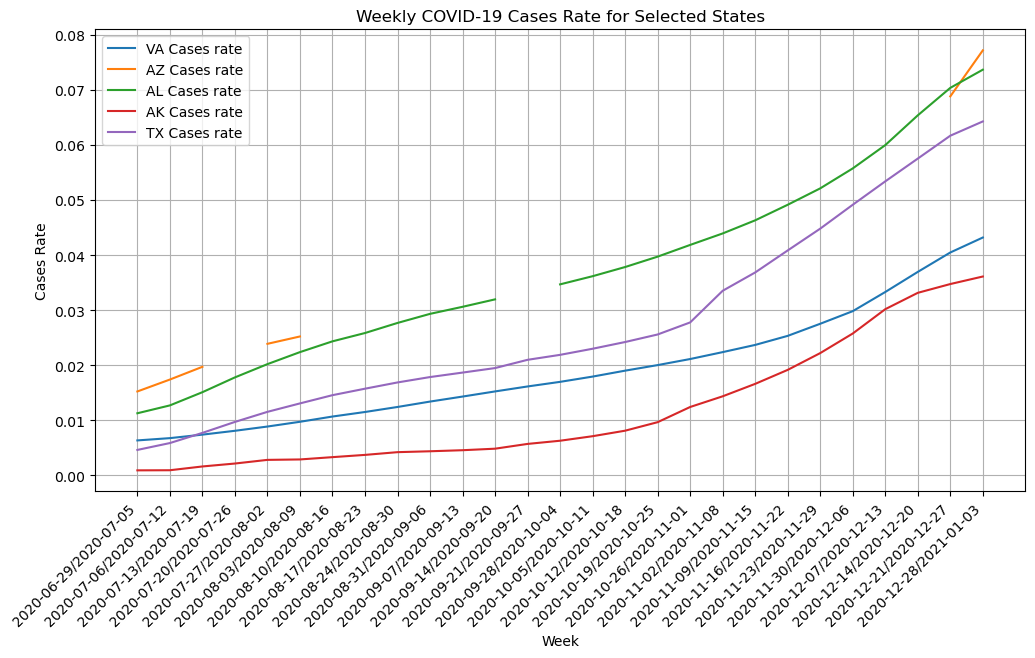

In [30]:
# Plotting a line graph for cases
plt.figure(figsize=(12, 6))
for state in selected_states:
    plt.plot(weekly_data_nn['date'], weekly_data_nn['cases_rate'][state], label=f'{state} Cases rate')

plt.xlabel('Week')
plt.ylabel('Cases Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Cases Rate for Selected States')
plt.legend()
plt.grid(True)
plt.show()

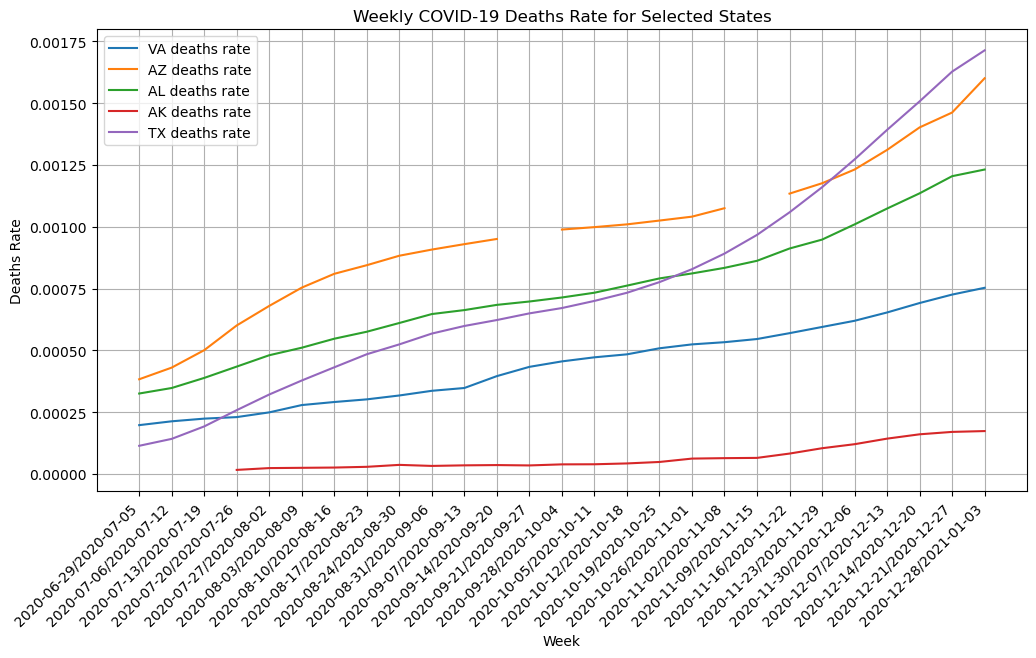

In [31]:
# Plotting a line graph for cases
plt.figure(figsize=(12, 6))
for state in selected_states:
    plt.plot(weekly_data_nn['date'], weekly_data_nn['deaths_rate'][state], label=f'{state} deaths rate')

plt.xlabel('Week')
plt.ylabel('Deaths Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Deaths Rate for Selected States')
plt.legend()
plt.grid(True)
plt.show()

#### The normalization factor is chosen to scale down the population values. This helps in creating a normalized representation of population values per unit, making it easier to compare with other numerical values (cases and deaths).
#### Here I am choosing 10,000 as normalization factor on analysing data.

In [32]:
selected_data['population']= selected_data['population']/10000
selected_data

C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\1291830962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['population']= selected_data['population']/10000


,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,cases_rate,deaths_rate
0,0,Statewide Unallocated,AL,1,0.0000,2020-07-01,0,0,NaN,NaN
2601,0,Statewide Unallocated,AK,2,0.0000,2020-07-01,0,0,NaN,NaN
5202,0,Statewide Unallocated,AZ,4,0.0000,2020-07-01,0,0,NaN,NaN
111843,0,Statewide Unallocated,TX,48,0.0000,2020-07-01,0,0,NaN,NaN
119646,0,Statewide Unallocated,VA,51,0.0000,2020-07-01,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24985718,51800,City of Suffolk,VA,51,9.2108,2020-12-31,3987,90,0.043286,0.000977
24985719,51810,City of Virginia Beach,VA,51,44.9974,2020-12-31,16629,150,0.036955,0.000333
24985720,51820,City of Waynesboro,VA,51,2.2630,2020-12-31,1194,13,0.052762,0.000574
24985721,51830,City of Williamsburg,VA,51,1.4954,2020-12-31,358,8,0.023940,0.000535


In [33]:
# Calculating cases and deaths rate
selected_data['cases_rate']=selected_data['cases']/selected_data['population']
selected_data['deaths_rate']=selected_data['deaths']/selected_data['population']
selected_data

C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\3515174282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['cases_rate']=selected_data['cases']/selected_data['population']
C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\3515174282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['deaths_rate']=selected_data['deaths']/selected_data['population']


,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,cases_rate,deaths_rate
0,0,Statewide Unallocated,AL,1,0.0000,2020-07-01,0,0,NaN,NaN
2601,0,Statewide Unallocated,AK,2,0.0000,2020-07-01,0,0,NaN,NaN
5202,0,Statewide Unallocated,AZ,4,0.0000,2020-07-01,0,0,NaN,NaN
111843,0,Statewide Unallocated,TX,48,0.0000,2020-07-01,0,0,NaN,NaN
119646,0,Statewide Unallocated,VA,51,0.0000,2020-07-01,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24985718,51800,City of Suffolk,VA,51,9.2108,2020-12-31,3987,90,432.861424,9.771138
24985719,51810,City of Virginia Beach,VA,51,44.9974,2020-12-31,16629,150,369.554685,3.333526
24985720,51820,City of Waynesboro,VA,51,2.2630,2020-12-31,1194,13,527.618206,5.744587
24985721,51830,City of Williamsburg,VA,51,1.4954,2020-12-31,358,8,239.400829,5.349739


In [34]:
# Grouping by week (state level)
weekly_data = selected_data.groupby([selected_data['date'].dt.to_period("W"), 'State']).agg({
    'cases_rate': 'mean',
    'deaths_rate': 'mean'
}).unstack().reset_index()
weekly_data

date  cases_rate                                      \
State                                 AK          AL          AZ          TX   
0      2020-06-29/2020-07-05    9.012427  112.696595  152.291002   46.108296   
1      2020-07-06/2020-07-12    9.222802  126.974868  173.939021   58.586157   
2      2020-07-13/2020-07-19   16.079384  150.966004  197.053742   77.066107   
3      2020-07-20/2020-07-26   21.410371  177.848787         NaN   96.964349   
4      2020-07-27/2020-08-02   28.042129  201.933731  238.822043  115.275881   
5      2020-08-03/2020-08-09   28.824735  223.761677  252.183215  130.596491   
6      2020-08-10/2020-08-16   33.000864  243.335566         NaN  145.559390   
7      2020-08-17/2020-08-23   37.092021  258.433930         NaN  157.313692   
8      2020-08-24/2020-08-30   42.050096  276.727270         NaN  168.677298   
9      2020-08-31/2020-09-06   43.680606  293.234445         NaN  178.457328   
10     2020-09-07/2020-09-13   45.590717  306.039386  285.221816  186.577170   
11     2020-09-14/2020-09-20   48.360973  319.563557         NaN  194.790470   
12     2020-09-21/2020-09-27   57.021739         NaN         NaN  209.775936   
13     2020-09-28/2020-10-04   62.814373  346.812827         NaN  218.788095   
14     2020-10-05/2020-10-11   71.042682  361.629796  311.796489  229.884480   
15     2020-10-12/2020-10-18   81.047041  378.298584         NaN  242.092172   
16     2020-10-19/2020-10-25   96.514274  397.159632         NaN  255.782542   
17     2020-10-26/2020-11-01  124.097984  418.446928         NaN  277.692869   
18     2020-11-02/2020-11-08  143.503976  439.288335         NaN  335.162210   
19     2020-11-09/2020-11-15  166.102670  463.118709         NaN  368.451319   
20     2020-11-16/2020-11-22  191.504858  491.374272  425.703294  408.425253   
21     2020-11-23/2020-11-29  221.995274  521.169679         NaN  448.025801   
22     2020-11-30/2020-12-06  257.539652  557.395135  527.781083  491.390221   
23     2020-12-07/2020-12-13  301.719407  599.725514         NaN  533.863576   
24     2020-12-14/2020-12-20  331.429990  653.782214         NaN  575.246325   
25     2020-12-21/2020-12-27  347.389089  703.702506  688.217798  616.815293   
26     2020-12-28/2021-01-03  361.070715  736.707854  771.810059  642.706563   

                  deaths_rate                                             
State          VA          AK         AL         AZ         TX        VA  
0       63.389576    0.141404   3.251104   3.828054   1.135197  1.971576  
1       67.527008         NaN   3.474536   4.299953   1.415660  2.126537  
2       73.888902         NaN   3.882653   5.005356   1.919735  2.235015  
3       80.864852    0.159849   4.341154   6.006595   2.578167  2.296884  
4       88.593984    0.232925   4.800906   6.797587   3.211537  2.488299  
5       97.225727    0.244096   5.105350   7.537059   3.778051  2.784188  
6      106.760018    0.254980   5.469350   8.096421   4.312400  2.907355  
7      114.998329    0.284490   5.752123   8.444996   4.841272  3.014787  
8      124.124537    0.363222   6.105589   8.828381   5.239849  3.171803  
9      133.930259    0.320908   6.467715   9.077301   5.677800  3.361207  
10     143.030516    0.344170   6.628109   9.296780   5.984957  3.474537  
11     152.359360    0.355300   6.839213   9.506500   6.225515  3.955730  
12     161.375479    0.340720   6.975303        NaN   6.494930  4.330517  
13     169.747608    0.383685   7.138179   9.887870   6.710776  4.551630  
14     179.311601    0.387790   7.331145   9.985763   6.999412  4.716552  
15     190.083395    0.421587   7.617986  10.097473   7.328344  4.836908  
16     200.188764    0.480979   7.909683  10.251746   7.760019  5.081951  
17     211.209383    0.617396   8.111161  10.409765   8.283090  5.239971  
18     223.749699    0.635411   8.337473  10.751115   8.914897  5.328513  
19     236.832382    0.645924   8.623045        NaN   9.671223  5.456849  
20     253.275465    0.820514   9.120281  11.342150  

In [35]:
weekly_data['date']=weekly_data['date'].astype(str)
weekly_data

date  cases_rate                                      \
State                                 AK          AL          AZ          TX   
0      2020-06-29/2020-07-05    9.012427  112.696595  152.291002   46.108296   
1      2020-07-06/2020-07-12    9.222802  126.974868  173.939021   58.586157   
2      2020-07-13/2020-07-19   16.079384  150.966004  197.053742   77.066107   
3      2020-07-20/2020-07-26   21.410371  177.848787         NaN   96.964349   
4      2020-07-27/2020-08-02   28.042129  201.933731  238.822043  115.275881   
5      2020-08-03/2020-08-09   28.824735  223.761677  252.183215  130.596491   
6      2020-08-10/2020-08-16   33.000864  243.335566         NaN  145.559390   
7      2020-08-17/2020-08-23   37.092021  258.433930         NaN  157.313692   
8      2020-08-24/2020-08-30   42.050096  276.727270         NaN  168.677298   
9      2020-08-31/2020-09-06   43.680606  293.234445         NaN  178.457328   
10     2020-09-07/2020-09-13   45.590717  306.039386  285.221816  186.577170   
11     2020-09-14/2020-09-20   48.360973  319.563557         NaN  194.790470   
12     2020-09-21/2020-09-27   57.021739         NaN         NaN  209.775936   
13     2020-09-28/2020-10-04   62.814373  346.812827         NaN  218.788095   
14     2020-10-05/2020-10-11   71.042682  361.629796  311.796489  229.884480   
15     2020-10-12/2020-10-18   81.047041  378.298584         NaN  242.092172   
16     2020-10-19/2020-10-25   96.514274  397.159632         NaN  255.782542   
17     2020-10-26/2020-11-01  124.097984  418.446928         NaN  277.692869   
18     2020-11-02/2020-11-08  143.503976  439.288335         NaN  335.162210   
19     2020-11-09/2020-11-15  166.102670  463.118709         NaN  368.451319   
20     2020-11-16/2020-11-22  191.504858  491.374272  425.703294  408.425253   
21     2020-11-23/2020-11-29  221.995274  521.169679         NaN  448.025801   
22     2020-11-30/2020-12-06  257.539652  557.395135  527.781083  491.390221   
23     2020-12-07/2020-12-13  301.719407  599.725514         NaN  533.863576   
24     2020-12-14/2020-12-20  331.429990  653.782214         NaN  575.246325   
25     2020-12-21/2020-12-27  347.389089  703.702506  688.217798  616.815293   
26     2020-12-28/2021-01-03  361.070715  736.707854  771.810059  642.706563   

                  deaths_rate                                             
State          VA          AK         AL         AZ         TX        VA  
0       63.389576    0.141404   3.251104   3.828054   1.135197  1.971576  
1       67.527008         NaN   3.474536   4.299953   1.415660  2.126537  
2       73.888902         NaN   3.882653   5.005356   1.919735  2.235015  
3       80.864852    0.159849   4.341154   6.006595   2.578167  2.296884  
4       88.593984    0.232925   4.800906   6.797587   3.211537  2.488299  
5       97.225727    0.244096   5.105350   7.537059   3.778051  2.784188  
6      106.760018    0.254980   5.469350   8.096421   4.312400  2.907355  
7      114.998329    0.284490   5.752123   8.444996   4.841272  3.014787  
8      124.124537    0.363222   6.105589   8.828381   5.239849  3.171803  
9      133.930259    0.320908   6.467715   9.077301   5.677800  3.361207  
10     143.030516    0.344170   6.628109   9.296780   5.984957  3.474537  
11     152.359360    0.355300   6.839213   9.506500   6.225515  3.955730  
12     161.375479    0.340720   6.975303        NaN   6.494930  4.330517  
13     169.747608    0.383685   7.138179   9.887870   6.710776  4.551630  
14     179.311601    0.387790   7.331145   9.985763   6.999412  4.716552  
15     190.083395    0.421587   7.617986  10.097473   7.328344  4.836908  
16     200.188764    0.480979   7.909683  10.251746   7.760019  5.081951  
17     211.209383    0.617396   8.111161  10.409765   8.283090  5.239971  
18     223.749699    0.635411   8.337473  10.751115   8.914897  5.328513  
19     236.832382    0.645924   8.623045        NaN   9.671223  5.456849  
20     253.275465    0.820514   9.120281  11.342150  

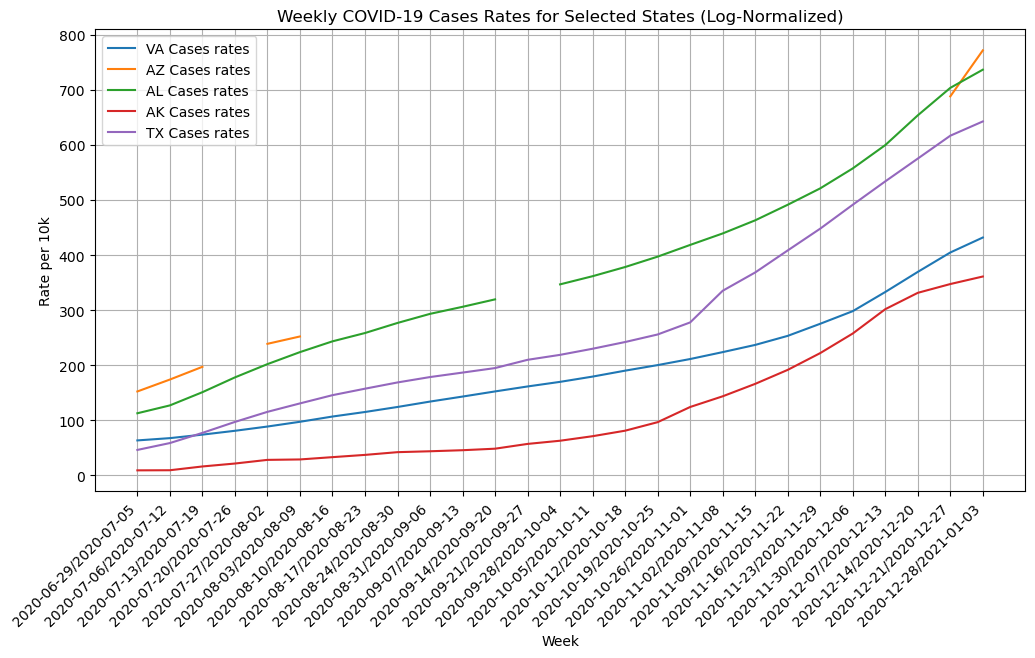

In [36]:
# Plotting a line graph for cases
plt.figure(figsize=(12, 6))
for state in selected_states:
    plt.plot(weekly_data['date'], weekly_data['cases_rate'][state], label=f'{state} Cases rates')

plt.xlabel('Week')
plt.ylabel('Rate per 10k')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Cases Rates for Selected States (Log-Normalized)')
plt.legend()
plt.grid(True)
plt.show()


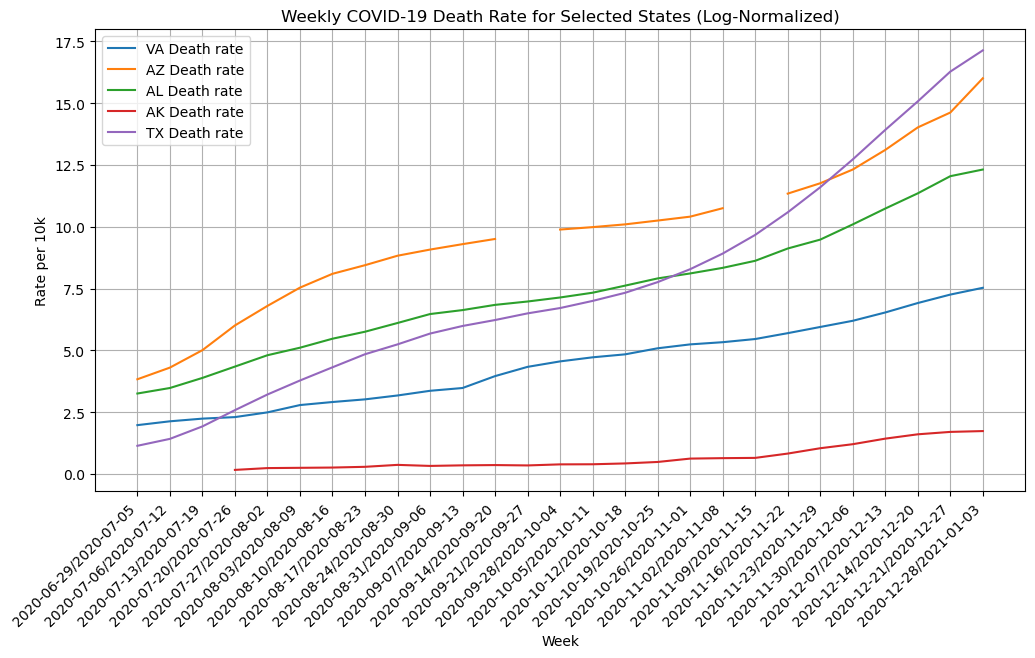

In [37]:
# Plotting a line graph for deaths
plt.figure(figsize=(12, 6))
for state in selected_states:
    plt.plot(weekly_data['date'], weekly_data['deaths_rate'][state], label=f'{state} Death rate')

plt.xlabel('Week')
plt.ylabel('Rate per 10k')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Death Rate for Selected States (Log-Normalized)')
plt.legend()
plt.grid(True)
plt.show()

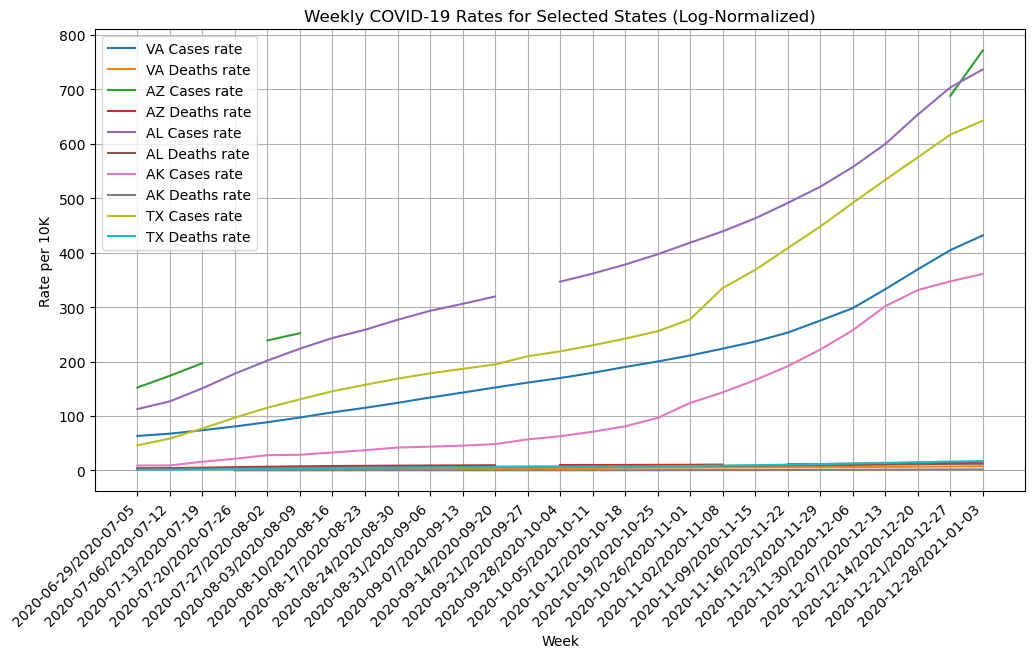

In [38]:
# Plotting a single line graph for both cases and deaths values.
plt.figure(figsize=(12, 6))
for state in selected_states:
    plt.plot(weekly_data['date'], weekly_data['cases_rate'][state], label=f'{state} Cases rate')
    plt.plot(weekly_data['date'], weekly_data['deaths_rate'][state], label=f'{state} Deaths rate')

plt.xlabel('Week')
plt.ylabel('Rate per 10K')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Rates for Selected States (Log-Normalized)')
plt.legend()
plt.grid(True)


In [39]:
total_population_statewide=selected_data_nn.groupby('State')['population'].sum().reset_index()
A=total_population_statewide.sort_values(by=['population'])
A

,State,population
0,AK,13460.4280
1,AL,90218.6040
2,AZ,133928.3928
4,VA,157053.5496
3,TX,533524.2104


### Summary 
### Describing the rates across selected states
###### On analysing the data and observing the plots, during the initial weeks of the pandeic the number of cases are comparatively less and there is a constant raise in cases as the time goes on, except for the Arizona State. 
###### The highest number of cases are registered in the week (2020-12-21 to 2021-12-27) [PEAKS] for every state. The reasons behind the number of cases recorded are high during the november and the decemeber months and varying rates across the states might be:
1.Being  festive season,
2.Peak winter, 
3.Delay in implementing public health measures, 
4.Inadequate health infrastructure,
5.Global connectivity, not following public health measures, 
6.Encountering New variants (DELTA and Gamma) which are way more potential leading to increased transmissibility.
###### One of the key reasons behind the rates differing across the states is elaborated below:
###### Low deaths are recorded for Alaska and the state of Texas has the highest number of deaths recorded in the last week. 
###### The highest and lowest cases and deaths recorded is basically directly proportional to the population of the state.
###### Beacuse, overall highest number of cases and deaths are recorded for the state of Texas (highly pouplated among other states) and the lowest cases and deaths are recorded for the Alaska state (has lowest population comparatively). So, i observe that the pattern is same across all the five states, that is, the number of cases recorded and the deaths reported are directly proportional to the population of the state.

### Identifying peaks for each state

In [40]:
states = selected_data['State'].unique()

peak_data = []

for state in selected_states:
    state_data = selected_data[selected_data['State'] == state]
    a = state_data.groupby(state_data['date'].dt.to_period("W")).agg({
        'cases': 'sum',
        'deaths': 'sum'
    }).reset_index()

    max_cases_week = a.loc[a['cases'].idxmax()]
    max_deaths_week = a.loc[a['deaths'].idxmax()]

    peak_data.append({
        'State': state,
        'Cases Peak Week': max_cases_week['date'],
        'Cases Peak Value': max_cases_week['cases'],
        'Deaths Peak Week': max_deaths_week['date'],
        'Deaths Peak Value': max_deaths_week['deaths'],
    })
peak_df = pd.DataFrame(peak_data)
peak_df

,State,Cases Peak Week,Cases Peak Value,Deaths Peak Week,Deaths Peak Value
0,VA,2020-12-21/2020-12-27,2259554,2020-12-21/2020-12-27,33410
1,AZ,2020-12-21/2020-12-27,3175179,2020-12-21/2020-12-27,55797
2,AL,2020-12-21/2020-12-27,2359521,2020-12-21/2020-12-27,32156
3,AK,2020-12-21/2020-12-27,310987,2020-12-21/2020-12-27,1640
4,TX,2020-12-21/2020-12-27,11482028,2020-12-21/2020-12-27,205970


######  2020-12-21 to 2020-12-27 is the PEAK WEEK (higher cases and deaths are recorded for all the selected states in this period). It might rather be the last week that is, 2020-12-28 to 2021-01-03 if the data of the january is taken into consideration, as we have only taken data from july 2020 to dec 2020 that particular week consists of only four days data (28,29,30,31 of dec 2020) which leads to 2020-12-21 to 2020-12-27 being the PEAK WEEK.

### Compare with the US pattern 

In [41]:
# Observing trends of the US cases and deaths in the selected date range per population
USdata=Main_df
USdata['cases_rate']=USdata['cases']/USdata['population']
USdata['deaths_rate']=USdata['deaths']/USdata['population']
USdata.replace([np.inf, -np.inf], np.nan, inplace=True)
USdata

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,cases_rate,deaths_rate
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0,NaN,NaN
2601,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0,NaN,NaN
5202,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0,NaN,NaN
7803,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0,NaN,NaN
10404,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24985907,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16,0.070047,0.000378
24985908,56039,Teton County,WY,56,23464,2020-12-31,2138,4,0.091118,0.000170
24985909,56041,Uinta County,WY,56,20226,2020-12-31,1558,7,0.077030,0.000346
24985910,56043,Washakie County,WY,56,7805,2020-12-31,781,19,0.100064,0.002434


In [42]:
# Grouping by week
US_weekly_data = USdata.groupby(USdata['date'].dt.to_period("W")).agg({
    'cases_rate': 'sum',
    'deaths_rate': 'sum'
}).reset_index()
US_weekly_data

US_weekly_data['date']=US_weekly_data['date'].astype('str')
US_weekly_data

,date,cases_rate,deaths_rate
0,2020-06-29/2020-07-05,85.610357,2.788032
1,2020-07-06/2020-07-12,135.177135,4.128409
2,2020-07-13/2020-07-19,157.793904,4.442425
3,2020-07-20/2020-07-26,183.094002,4.827446
4,2020-07-27/2020-08-02,209.211832,5.279664
5,2020-08-03/2020-08-09,234.172459,5.773501
6,2020-08-10/2020-08-16,258.550614,6.297648
7,2020-08-17/2020-08-23,280.504572,6.795887
8,2020-08-24/2020-08-30,303.518006,7.315504
9,2020-08-31/2020-09-06,327.273057,7.815797


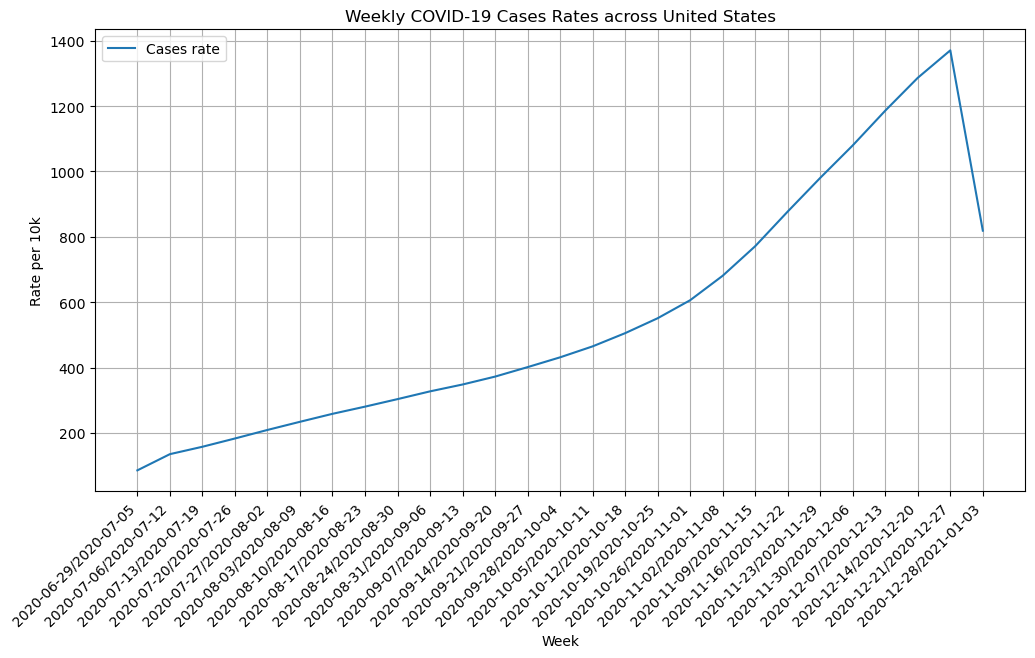

In [43]:
# Plotting a line graph for cases across US.
plt.figure(figsize=(12, 6))
plt.plot(US_weekly_data['date'], US_weekly_data['cases_rate'], label=f'Cases rate')
plt.xlabel('Week')
plt.ylabel('Rate per 10k')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Cases Rates across United States')
plt.legend()
plt.grid(True)
plt.show()

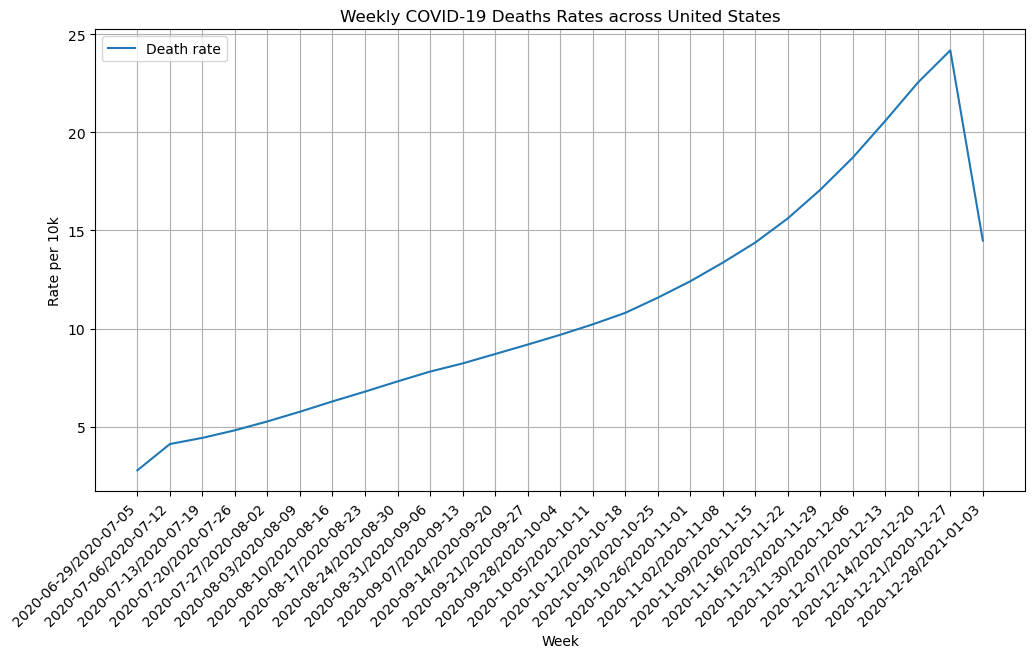

In [44]:
# Plotting a line graph for cases across US.
plt.figure(figsize=(12, 6))
plt.plot(US_weekly_data['date'], US_weekly_data['deaths_rate'], label=f'Death rate')
plt.xlabel('Week')
plt.ylabel('Rate per 10k')
plt.xticks(rotation=45, ha='right')
plt.title('Weekly COVID-19 Deaths Rates across United States')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Grouping the data across US by week and finding peak values for Cases and Deaths.
US_peak_data=[]
US_data = Main_df.groupby(Main_df['date'].dt.to_period("W")).agg({
    'cases': 'sum',
    'deaths': 'sum'
}).reset_index()

US_max_cases_week = US_data.loc[US_data['cases'].idxmax()]
US_max_deaths_week = US_data.loc[US_data['deaths'].idxmax()]

US_peak_data.append({
        'Cases Peak Week': US_max_cases_week['date'],
        'Cases Peak Value': US_max_cases_week['cases'],
        'Deaths Peak Week': US_max_deaths_week['date'],
        'Deaths Peak Value': US_max_deaths_week['deaths'],
    })
US_peak_df=pd.DataFrame(US_peak_data)
US_peak_df

,Cases Peak Week,Cases Peak Value,Deaths Peak Week,Deaths Peak Value
0,2020-12-21/2020-12-27,129737094,2020-12-21/2020-12-27,2338334


In [46]:
# Comparing state peaks with the US pattern
peak_df['Cases Peak vs US'] = peak_df.apply(lambda row: row['Cases Peak Value'] / US_peak_df['Cases Peak Value'], axis=1)
peak_df['Deaths Peak vs US'] = peak_df.apply(lambda row: row['Deaths Peak Value'] /US_peak_df['Deaths Peak Value'], axis=1)
print(peak_df)

  State        Cases Peak Week  Cases Peak Value       Deaths Peak Week  \
0    VA  2020-12-21/2020-12-27           2259554  2020-12-21/2020-12-27   
1    AZ  2020-12-21/2020-12-27           3175179  2020-12-21/2020-12-27   
2    AL  2020-12-21/2020-12-27           2359521  2020-12-21/2020-12-27   
3    AK  2020-12-21/2020-12-27            310987  2020-12-21/2020-12-27   
4    TX  2020-12-21/2020-12-27          11482028  2020-12-21/2020-12-27   

   Deaths Peak Value  Cases Peak vs US  Deaths Peak vs US  
0              33410          0.017416           0.014288  
1              55797          0.024474           0.023862  
2              32156          0.018187           0.013752  
3               1640          0.002397           0.000701  
4             205970          0.088502           0.088084  


### Conclusion
##### I observe that there is a constant raise in the cases and deaths from week one to till last week across US and the same is observed in case of all the 5 states analysed. 
##### Highest number of cases and deaths are recorded in the months of November and December.
##### Peak cases and Deaths for each state are recorded in the period of 2020-12-21 to 2020-12-27  and the same pattern is observed in the case of  entire US dataset as well. 

## 3. Identify five counties within a state of your choice with high cases and death rates.

In [47]:
# Choosing the same 'NC' state for the analysis
# Using the same transformed dataframe which consists of NC state related details for analysis.
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
85833,0,Statewide Unallocated,NC,37,0,2020-07-01,3,0
134541,37001,Alamance County,NC,37,169509,2020-07-01,1151,37
134542,37003,Alexander County,NC,37,37497,2020-07-01,93,1
134543,37005,Alleghany County,NC,37,11137,2020-07-01,32,0
134544,37007,Anson County,NC,37,24446,2020-07-01,132,1
...,...,...,...,...,...,...,...,...
24984755,37191,Wayne County,NC,37,123131,2020-12-31,7422,145
24984756,37193,Wilkes County,NC,37,68412,2020-12-31,3877,72
24984757,37195,Wilson County,NC,37,81801,2020-12-31,5516,103
24984758,37197,Yadkin County,NC,37,37667,2020-12-31,2377,28


In [48]:
cases_deaths['case_rate']=cases_deaths['cases']/cases_deaths['population']
cases_deaths['death_rate']=cases_deaths['deaths']/cases_deaths['population']

C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\3664187525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_deaths['case_rate']=cases_deaths['cases']/cases_deaths['population']
C:\Users\Keerthi Devireddy\AppData\Local\Temp\ipykernel_12444\3664187525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_deaths['death_rate']=cases_deaths['deaths']/cases_deaths['population']


In [49]:
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,case_rate,death_rate
85833,0,Statewide Unallocated,NC,37,0,2020-07-01,3,0,inf,NaN
134541,37001,Alamance County,NC,37,169509,2020-07-01,1151,37,0.006790,0.000218
134542,37003,Alexander County,NC,37,37497,2020-07-01,93,1,0.002480,0.000027
134543,37005,Alleghany County,NC,37,11137,2020-07-01,32,0,0.002873,0.000000
134544,37007,Anson County,NC,37,24446,2020-07-01,132,1,0.005400,0.000041
...,...,...,...,...,...,...,...,...,...,...
24984755,37191,Wayne County,NC,37,123131,2020-12-31,7422,145,0.060277,0.001178
24984756,37193,Wilkes County,NC,37,68412,2020-12-31,3877,72,0.056671,0.001052
24984757,37195,Wilson County,NC,37,81801,2020-12-31,5516,103,0.067432,0.001259
24984758,37197,Yadkin County,NC,37,37667,2020-12-31,2377,28,0.063106,0.000743


In [50]:
cases_deaths_groupby_county=cases_deaths.groupby(['County Name','countyFIPS']).agg({'cases':sum,'deaths':sum,'case_rate':sum,'death_rate':sum}).reset_index()
cases_deaths_groupby_county                                                                                                                                                                                                                                                                                                                                                                                                             

,County Name,countyFIPS,cases,deaths,case_rate,death_rate
0,Alamance County,37001,841877,12263,4.966562,0.072344
1,Alexander County,37003,156459,1578,4.172574,0.042083
2,Alleghany County,37005,48090,99,4.318039,0.008889
3,Anson County,37007,116288,1421,4.756934,0.058128
4,Ashe County,37009,75818,584,2.787119,0.021468
...,...,...,...,...,...,...
96,Wayne County,37191,723384,13613,5.874914,0.110557
97,Wilkes County,37193,298830,5970,4.368093,0.087265
98,Wilson County,37195,479054,10121,5.856334,0.123727
99,Yadkin County,37197,178490,1885,4.738631,0.050044


In [51]:
cases_deaths_rates_top5counties=cases_deaths_groupby_county.sort_values(by=['case_rate','death_rate'],ascending=False)

In [52]:
cases_deaths_rates_top5counties.head(5)

,County Name,countyFIPS,cases,deaths,case_rate,death_rate
30,Duplin County,37061,472323,9442,8.040772,0.160740
81,Sampson County,37163,448226,5038,7.055233,0.079300
61,Montgomery County,37123,189993,5188,6.991977,0.190925
77,Robeson County,37155,907681,14579,6.948754,0.111610
39,Greene County,37079,133532,2016,6.337842,0.095686


In [53]:
cases_deaths_rates_top5counties['County Name'].head(5)

30        Duplin County 
81       Sampson County 
61    Montgomery County 
77       Robeson County 
39        Greene County 
Name: County Name, dtype: object

## 4. Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [54]:
# Figured out the top 5 infected counties in the above steps
# Filtering out the other counties data.
top_counties=[37061,37163,37123,37155,37079]
top5_counties= cases_deaths[cases_deaths['countyFIPS'].isin(top_counties)]
top5_counties

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,case_rate,death_rate
134571,37061,Duplin County,NC,37,58741,2020-07-01,1468,27,0.024991,0.000460
134580,37079,Greene County,NC,37,21069,2020-07-01,175,3,0.008306,0.000142
134602,37123,Montgomery County,NC,37,27173,2020-07-01,317,7,0.011666,0.000258
134618,37155,Robeson County,NC,37,130625,2020-07-01,1218,38,0.009324,0.000291
134622,37163,Sampson County,NC,37,63531,2020-07-01,1060,6,0.016685,0.000094
...,...,...,...,...,...,...,...,...,...,...
24984690,37061,Duplin County,NC,37,58741,2020-12-31,4227,67,0.071960,0.001141
24984699,37079,Greene County,NC,37,21069,2020-12-31,1534,27,0.072808,0.001282
24984721,37123,Montgomery County,NC,37,27173,2020-12-31,1920,46,0.070658,0.001693
24984737,37155,Robeson County,NC,37,130625,2020-12-31,9840,137,0.075330,0.001049


In [55]:
# Grouping by week and aggregating cases and deaths count.
weeklydata_top5_counties=top5_counties.groupby([top5_counties['date'].dt.to_period("W"),'County Name']).agg({
    'cases': 'sum', 'deaths': 'sum'}).reset_index()
weeklydata_top5_counties

,date,County Name,cases,deaths
0,2020-06-29/2020-07-05,Duplin County,7613,137
1,2020-06-29/2020-07-05,Greene County,905,15
2,2020-06-29/2020-07-05,Montgomery County,1652,35
3,2020-06-29/2020-07-05,Robeson County,6455,190
4,2020-06-29/2020-07-05,Sampson County,5408,30
...,...,...,...,...
130,2020-12-28/2021-01-03,Duplin County,16713,268
131,2020-12-28/2021-01-03,Greene County,6053,108
132,2020-12-28/2021-01-03,Montgomery County,7565,184
133,2020-12-28/2021-01-03,Robeson County,38466,547


In [56]:
weeklydata_top5_counties['date']=weeklydata_top5_counties['date'].astype('str')

In [57]:
top_counties = weeklydata_top5_counties.groupby('County Name')['cases'].sum().nlargest(5).index
top_counties

Index(['Robeson County ', 'Duplin County ', 'Sampson County ',
       'Montgomery County ', 'Greene County '],
      dtype='object', name='County Name')

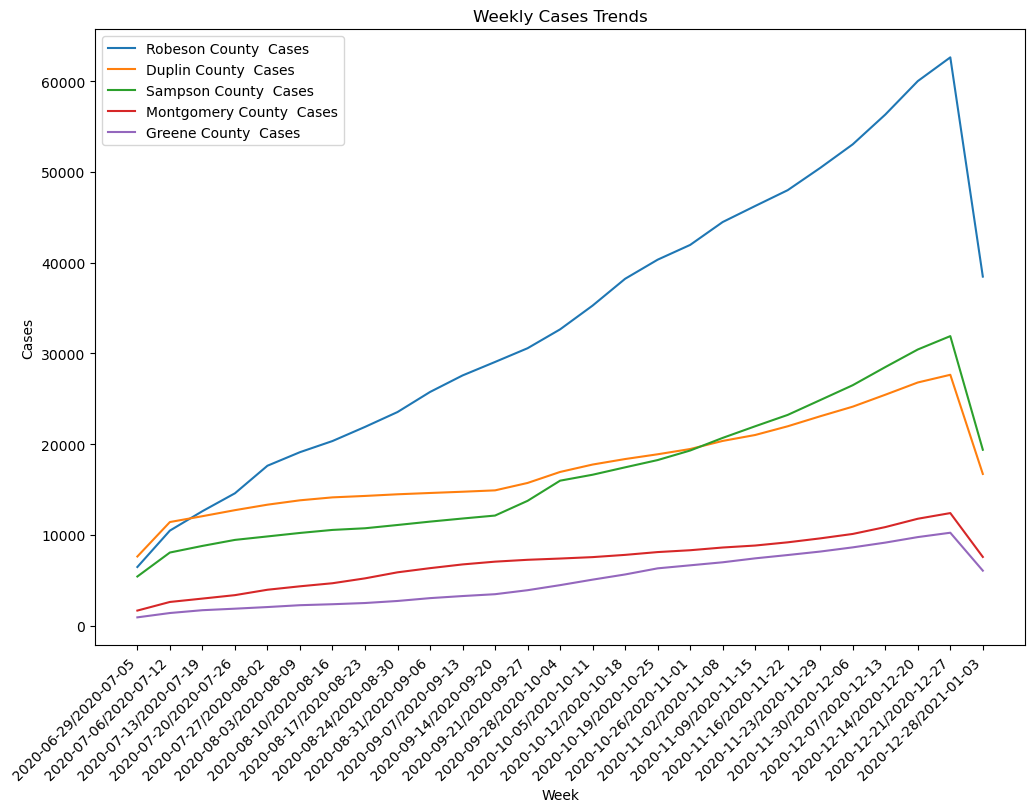

In [58]:
# Plotting Cases trends for the top 5 counties (raw values)
plt.figure(figsize=(12,8))
for county in top_counties:
    data = weeklydata_top5_counties[weeklydata_top5_counties['County Name'] == county]
    plt.plot(data['date'], data['cases'],label=f'{county} Cases')
plt.title('Weekly Cases Trends')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

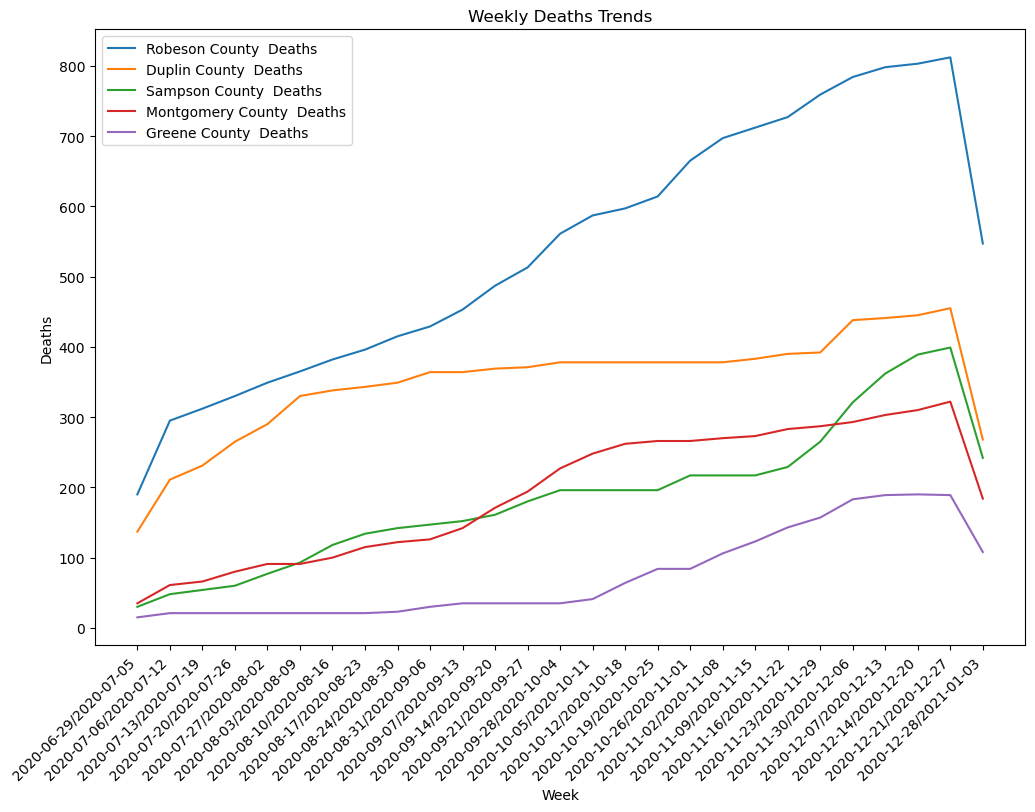

In [59]:
# Plotting Deaths trends for the top 5 counties (raw values)
plt.figure(figsize=(12,8))
for county in top_counties:
    data = weeklydata_top5_counties[weeklydata_top5_counties['County Name'] == county]
    plt.plot(data['date'], data['deaths'],label=f'{county} Deaths')
plt.title('Weekly Deaths Trends')
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

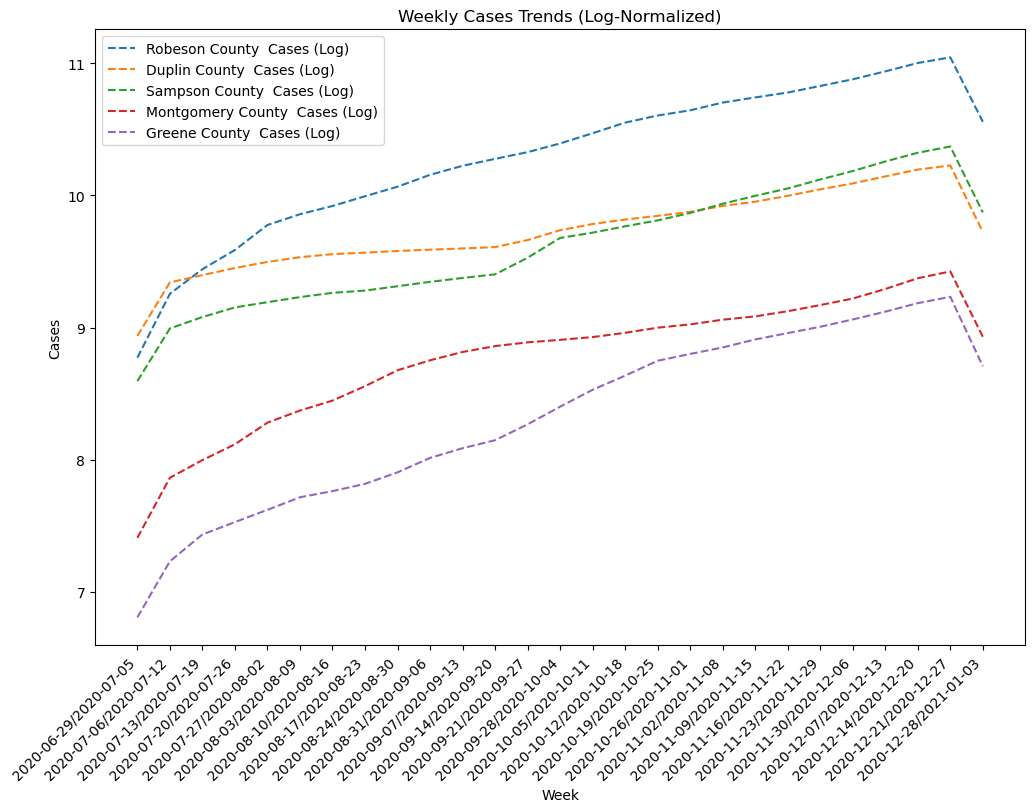

In [60]:
# Plotting Cases trends for the top 5 counties (log narmalized values)
plt.figure(figsize=(12,8))
for county in top_counties:
    data = weeklydata_top5_counties[weeklydata_top5_counties['County Name'] == county]
    plt.plot(data['date'], np.log(data['cases']), linestyle='--', label=f'{county} Cases (Log)')
plt.title('Weekly Cases Trends (Log-Normalized)')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

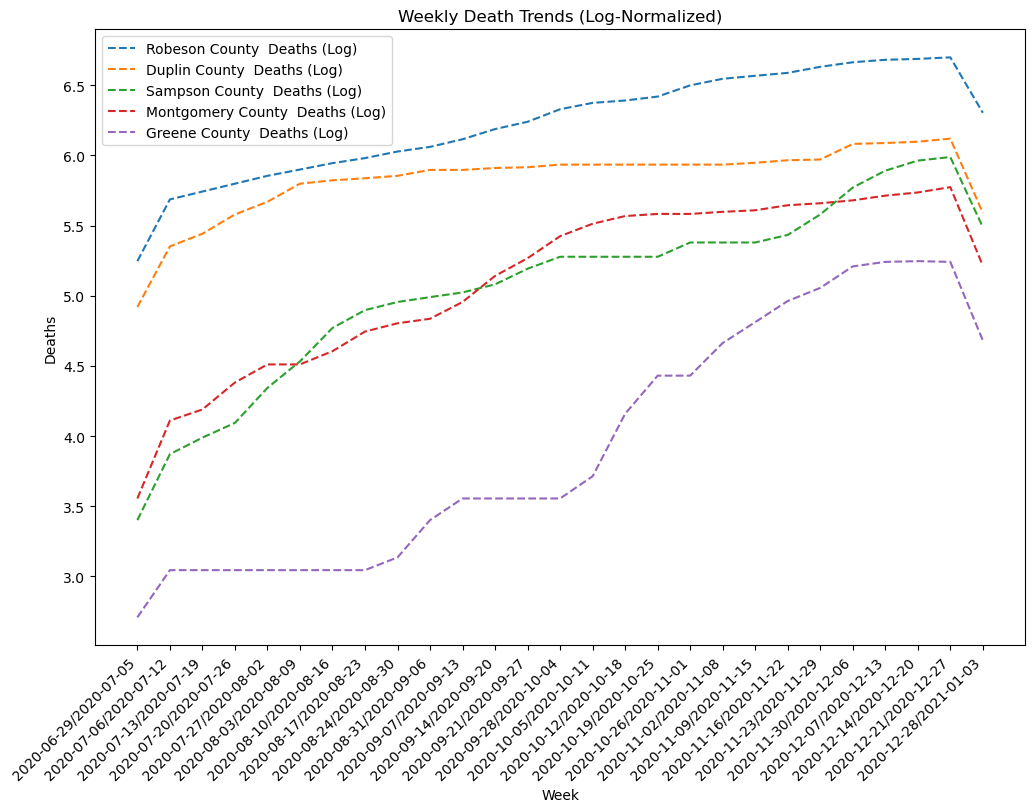

In [61]:
# Plotting Deaths trends for the top 5 counties (log narmalized values)
plt.figure(figsize=(12,8))
for county in top_counties:
    data = weeklydata_top5_counties[weeklydata_top5_counties['County Name'] == county]
    plt.plot(data['date'], np.log(data['deaths']), linestyle='--', label=f'{county} Deaths (Log)')
plt.title('Weekly Death Trends (Log-Normalized)')
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [62]:
total_population=top5_counties.groupby('County Name')['population'].sum().reset_index()
s=total_population.sort_values(by=['population'])
s

,County Name,population
1,Greene County,3876696
2,Montgomery County,4999832
0,Duplin County,10808344
4,Sampson County,11689704
3,Robeson County,24035000


### Summary 
### Describing the cases and deaths rates pattern across top 5 Counties of NC 
###### On analysing the data and observing the plots, during the initial weeks the number of cases and deaths are comparatively less and there are fluctuations in the graph plotted which says that the raise is not constant but  the highest number of cases are observed in the week (2020-12-29 to 2021-01-04) [PEAKS] for every County.
###### The number of cases recorded and deaths registered are high during the november and the decemeber months except for the Duplin County, the reasons for the increased counts in the November and December months and varying rates across counties:
1.Being  festive season,
2.Peak winter, 
3.Delay in implementing public health measures, 
4.Inadequate health infrastructure,
5.Global connectivity, not following public health measures, 
6.Encountering New variants (DELTA and Gamma) which are way more potential leading to increased transmissibility.
###### One of the key reasons behind the rates differing across the counties is elaborated below:
###### The highest and lowest cases and deaths recorded is basically directly proportional to the population of the County.
###### Beacuse, overall highest number of cases and deaths are recorded for the  Robeson county which is way highly pouplated among other counties and the lowest cases and deaths are recorded for the Greene County which has lowest population comparatively. So, i observe that the pattern is same across all the five counties, that is, the number of cases recorded and the deaths reported are directly proportional to the population of the county.

### Identifying the peaks

In [63]:
County_peak_data=[]
for county in top_counties:
    County = top5_counties[top5_counties['County Name'] == county]
    C = County.groupby(County['date'].dt.to_period("W")).agg({
        'cases': 'sum',
        'deaths': 'sum'
    }).reset_index()

    max_cases_week = C.loc[C['cases'].idxmax()]
    max_deaths_week = C.loc[C['deaths'].idxmax()]

    County_peak_data.append({
        'County': county,
        'Cases Peak Week': max_cases_week['date'],
        'Cases Peak Value': max_cases_week['cases'],
        'Deaths Peak Week': max_deaths_week['date'],
        'Deaths Peak Value': max_deaths_week['deaths'],
    })
County_peak_df = pd.DataFrame(County_peak_data)
County_peak_df 

,County,Cases Peak Week,Cases Peak Value,Deaths Peak Week,Deaths Peak Value
0,Robeson County,2020-12-21/2020-12-27,62635,2020-12-21/2020-12-27,812
1,Duplin County,2020-12-21/2020-12-27,27644,2020-12-21/2020-12-27,455
2,Sampson County,2020-12-21/2020-12-27,31907,2020-12-21/2020-12-27,399
3,Montgomery County,2020-12-21/2020-12-27,12399,2020-12-21/2020-12-27,322
4,Greene County,2020-12-21/2020-12-27,10233,2020-12-14/2020-12-20,190


######  2020-12-21 to 2020-12-27 is the PEAK WEEK (higher cases and deaths are recorded for all the counties in this period). It might rather be the last week that is, 2020-12-28 to 2021-01-03 if the data of the january is taken into consideration, as we have only taken data from july 2020 to dec 2020 that particular week consists of only four days data (28,29,30,31 of dec 2020) which leads to 2020-12-21 to 2020-12-27 being the PEAK WEEK.

#### Do the Counties follow State Pattern

In [64]:
# Grouping data by week for the entire state
cases_deaths = cases_deaths.groupby(cases_deaths['date'].dt.to_period("W-Mon")).agg({
    'cases': 'sum',
    'deaths': 'sum'
}).reset_index()

# Calculating the log-normalized values for the state
cases_deaths['log_cases'] = np.log(cases_deaths['cases'])
cases_deaths['log_deaths'] = np.log(cases_deaths['deaths'])
cases_deaths['date']=cases_deaths['date'].astype(str)
cases_deaths

,date,cases,deaths,log_cases,log_deaths
0,2020-06-30/2020-07-06,423999,8316,12.957486,9.025937
1,2020-07-07/2020-07-13,570839,10296,13.254862,9.239511
2,2020-07-14/2020-07-20,668431,11192,13.412688,9.322955
3,2020-07-21/2020-07-27,761701,12191,13.543309,9.408453
4,2020-07-28/2020-08-03,851881,13383,13.655202,9.501741
5,2020-08-04/2020-08-10,929193,14778,13.742072,9.600895
6,2020-08-11/2020-08-17,999816,16040,13.815327,9.682841
7,2020-08-18/2020-08-24,1069801,17370,13.882983,9.762500
8,2020-08-25/2020-08-31,1146950,18528,13.952617,9.827038
9,2020-09-01/2020-09-07,1214980,19799,14.010238,9.893387


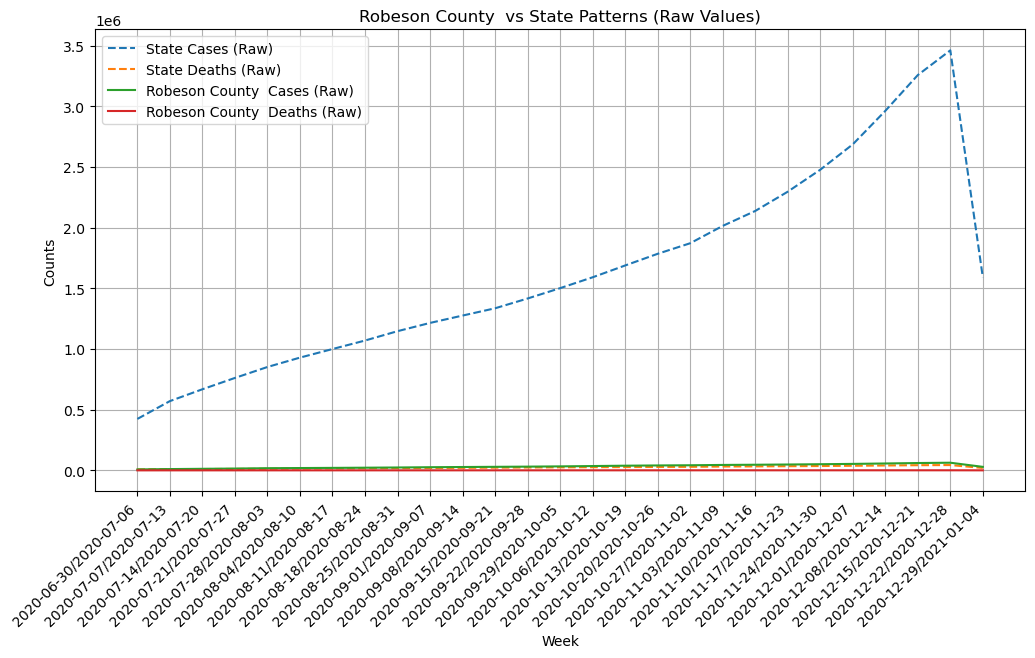

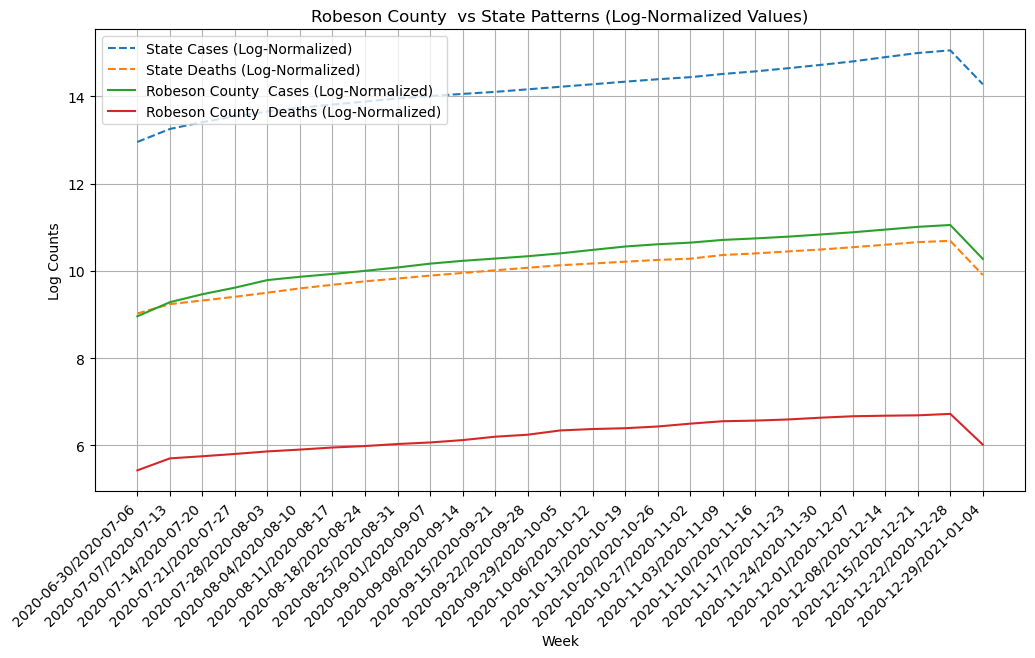

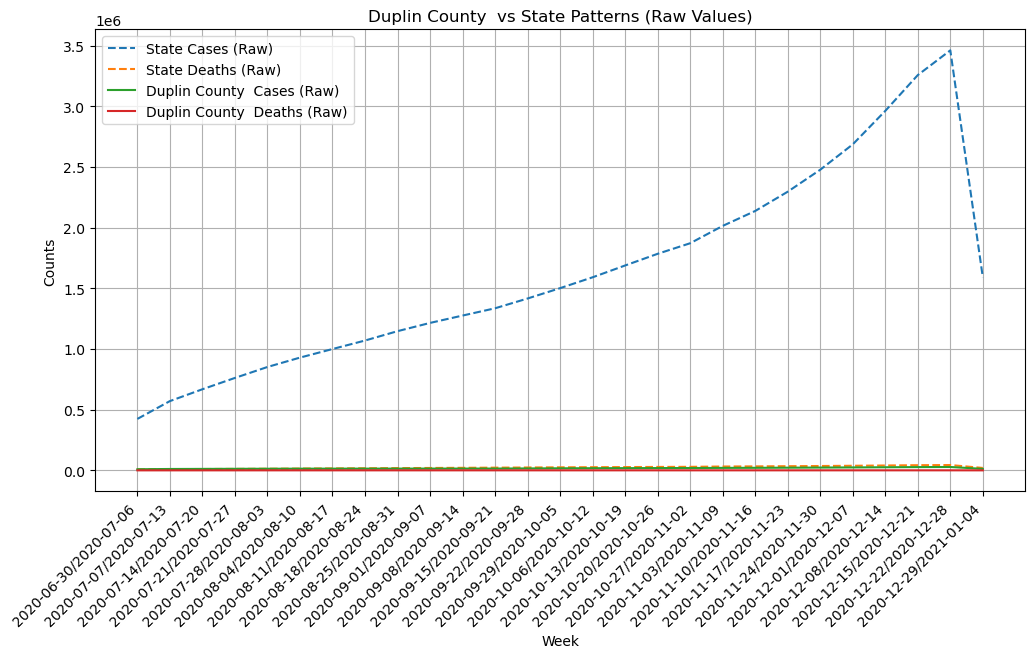

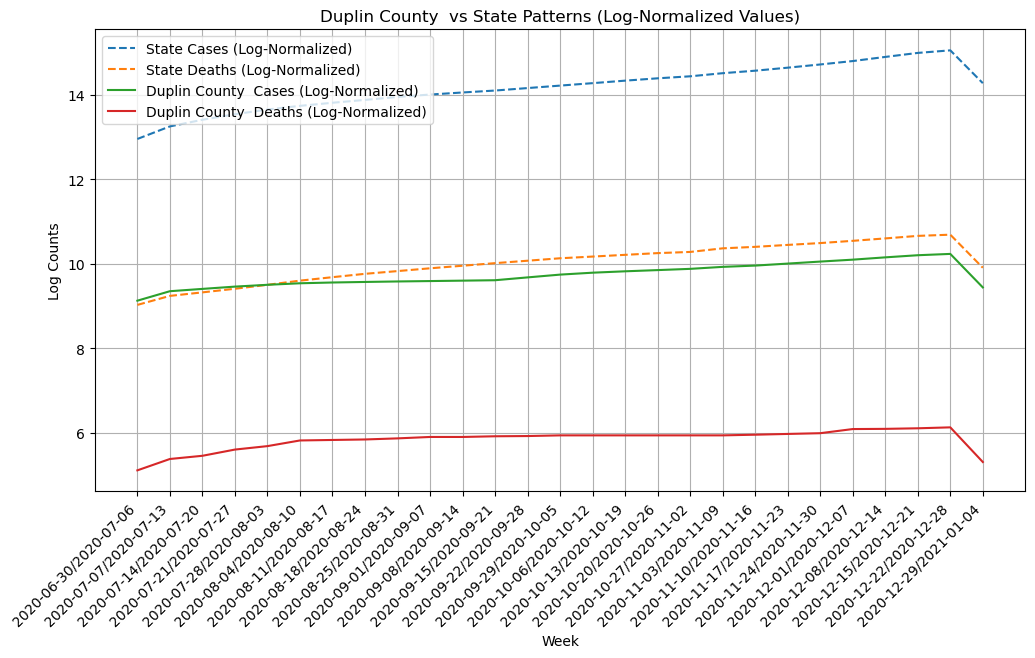

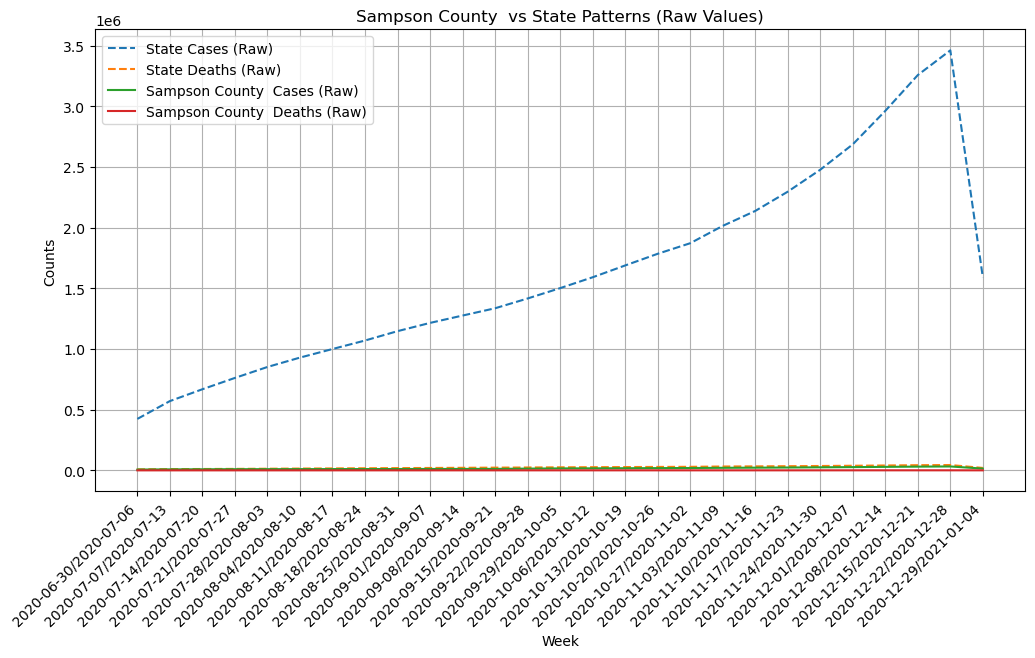

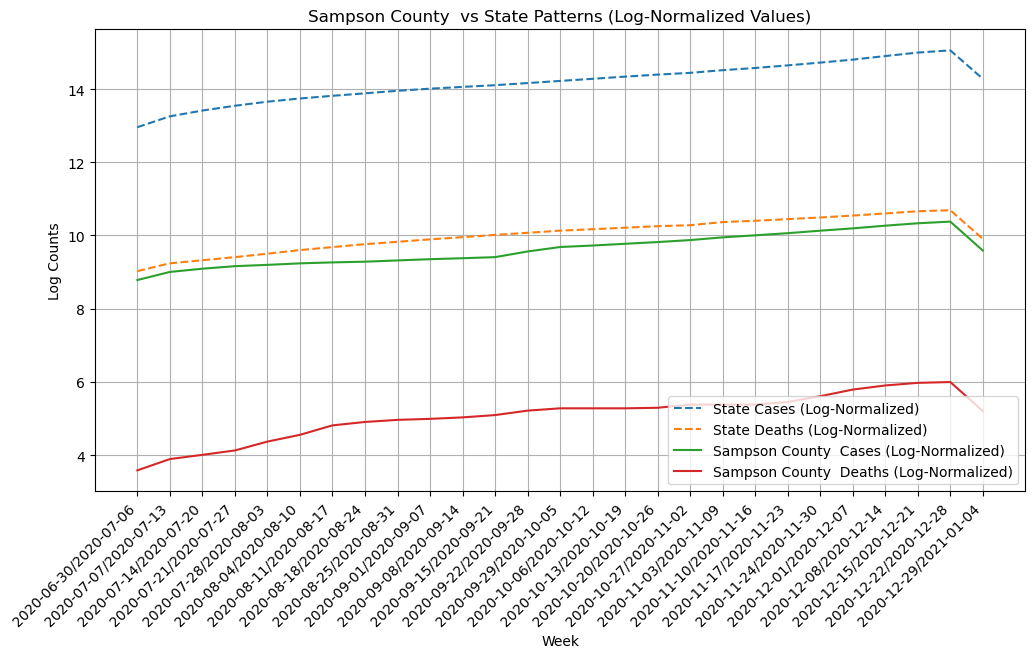

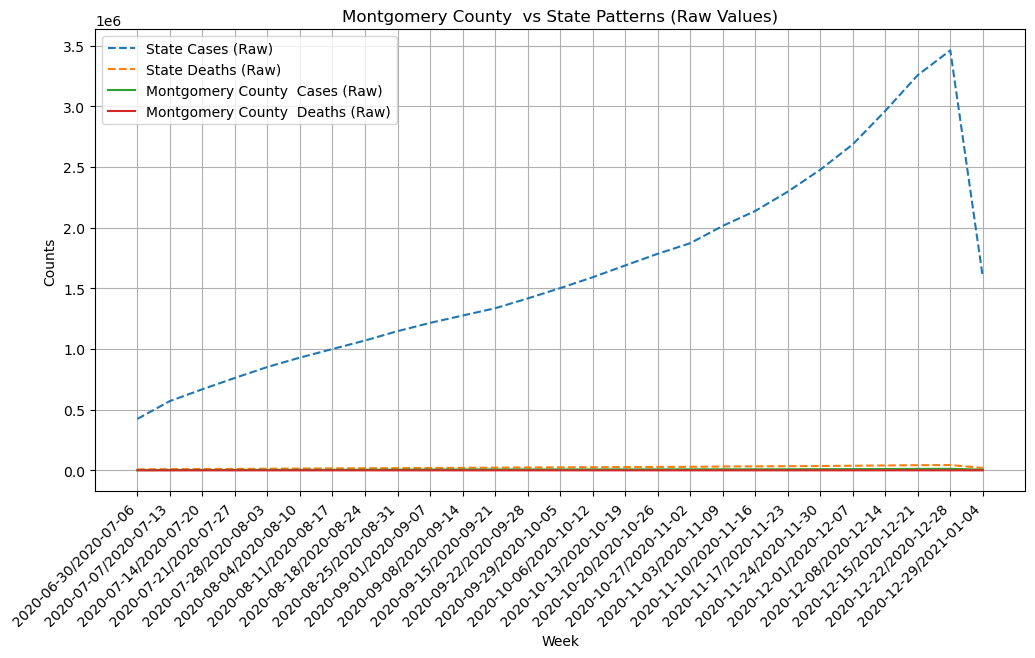

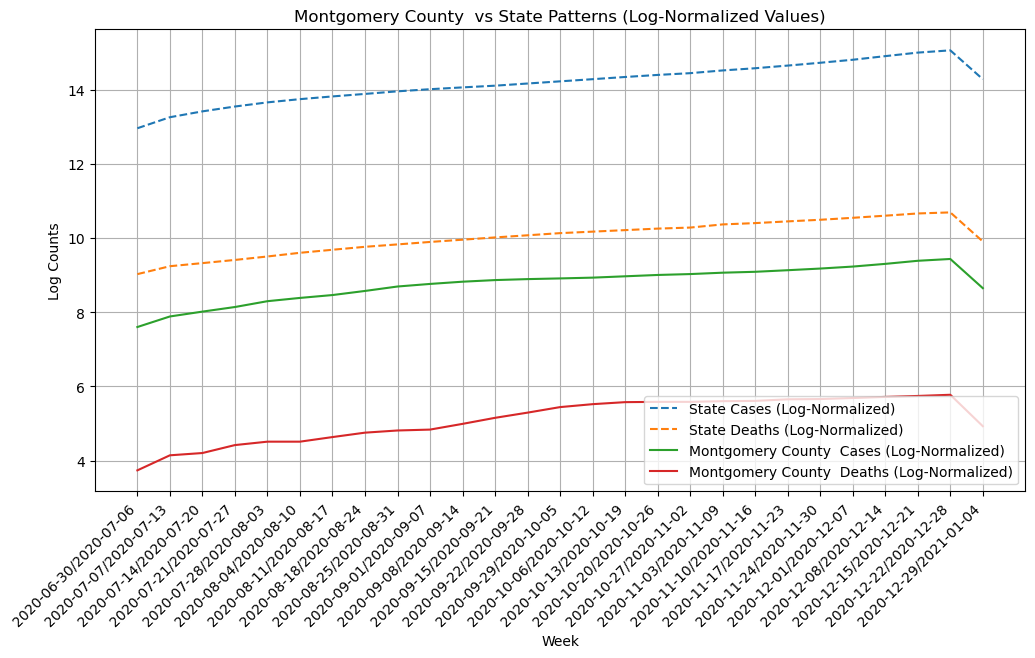

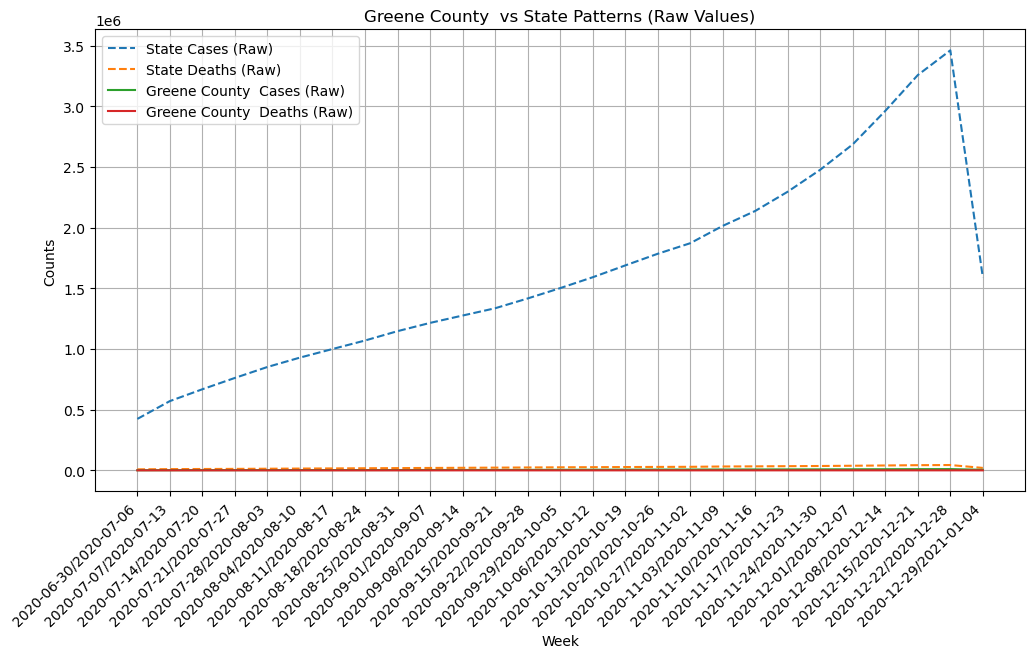

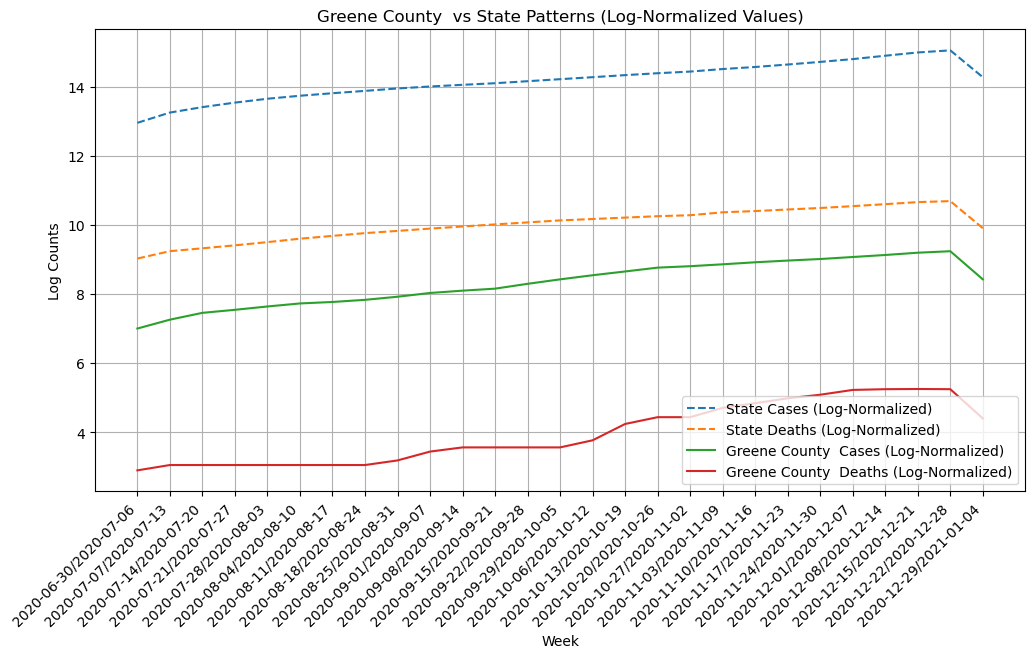

In [65]:
# Plotting counties vs state patterns
for county in top_counties:
    county_data = top5_counties[top5_counties['County Name'] == county]

    # Grouping by week for the counties
    county_weekly_data = county_data.groupby(county_data['date'].dt.to_period("W-Mon")).agg({
        'cases': 'sum',
        'deaths': 'sum'
    }).reset_index()

    # Calculating log-normalized values for the counties
    county_weekly_data['log_cases'] = np.log(county_weekly_data['cases'])
    county_weekly_data['log_deaths'] = np.log(county_weekly_data['deaths'])
    
    county_weekly_data['date']=county_weekly_data['date'].astype(str)

    # Plotting raw values
    plt.figure(figsize=(12, 6))
    plt.plot(cases_deaths['date'], cases_deaths['cases'], label='State Cases (Raw)', linestyle='--')
    plt.plot(cases_deaths['date'], cases_deaths['deaths'], label='State Deaths (Raw)', linestyle='--')
    plt.plot(county_weekly_data['date'], county_weekly_data['cases'], label=f'{county} Cases (Raw)')
    plt.plot(county_weekly_data['date'], county_weekly_data['deaths'], label=f'{county} Deaths (Raw)')
    
    plt.title(f'{county} vs State Patterns (Raw Values)')
    plt.xlabel('Week')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting log-normalized values
    plt.figure(figsize=(12, 6))
    plt.plot(cases_deaths['date'], cases_deaths['log_cases'], label='State Cases (Log-Normalized)', linestyle='--')
    plt.plot(cases_deaths['date'], cases_deaths['log_deaths'], label='State Deaths (Log-Normalized)', linestyle='--')
    plt.plot(county_weekly_data['date'], county_weekly_data['log_cases'], label=f'{county} Cases (Log-Normalized)')
    plt.plot(county_weekly_data['date'], county_weekly_data['log_deaths'], label=f'{county} Deaths (Log-Normalized)')

    plt.title(f'{county} vs State Patterns (Log-Normalized Values)')
    plt.xlabel('Week')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Log Counts')
    plt.legend()
    plt.grid(True)
    plt.show()

### Conclusion
###### The log-normalized plots provide the clearer view when compared to the raw plots as they are standardised.
###### I can observe that the counties pretty much follow the same pattern as their respective state does.
###### The cases and deaths are higher in count in the week (2020-12-21 to 2020-12-27) for all the counties, the same is observed in the case of the North Carolina state as well.
##### Leading to the conclusion that the counties follow same pattern as state does.
